## circutiti_2

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sys
sys.path.append("D:/Progetti/LabProgram")
from Routine import Routine
from Funnel import Funnel 
import lab_utilities as lu
from pyroot import *
from scipy.optimize import curve_fit
from scipy.cluster.vq import kmeans2
from scipy import stats

In [2]:
lu.setDefaultGraphStyle()

## Circuito RC

In [35]:
data_rc = pd.read_csv("data/RC/F0001CH2.CSV")
data_rc = data_rc.iloc[18:,3:-1]
data_rc.columns = ["t","V"]
data_rc.head(5)
time_rc = data_rc["t"].values
voltage_rc = data_rc["V"].values

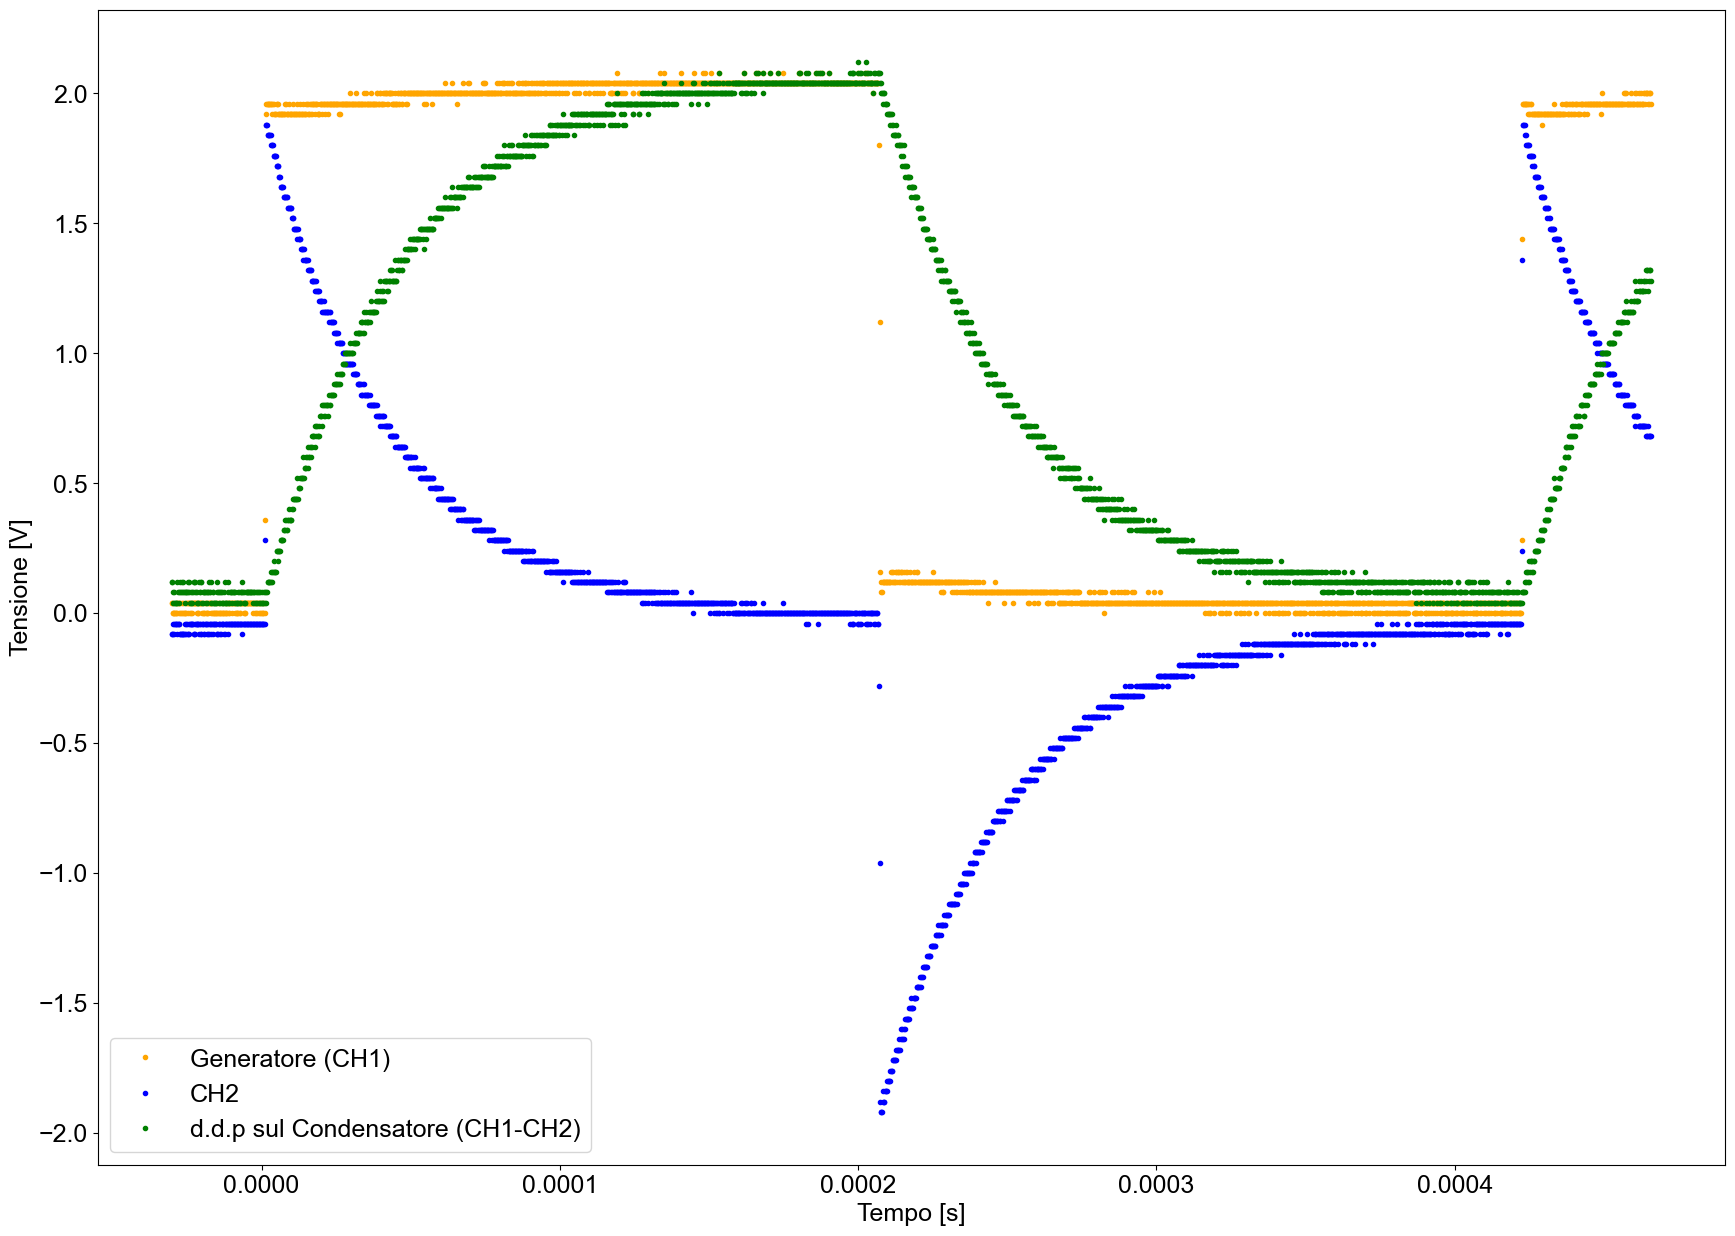

In [36]:
data_gen = pd.read_csv("data/RC/F0001CH1.CSV")
data_gen = data_gen.iloc[18:,3:-1]
data_gen.columns = ["t","V"]
#difference between the voltage of the RC and the voltage of the generator
voltage_capacitor = data_gen["V"].values - data_rc["V"].values
time_capacitor = data_gen["t"].values
#plot the difference no lines connecting the points
#in orange the voltage of the generator
plt.plot(data_gen["t"].values, data_gen["V"].values, color="orange", marker="o", markersize=3, label="Generatore (CH1)", linestyle="None")
#in blue the voltage of CH2
plt.plot(data_rc["t"].values, data_rc["V"].values, color="blue", marker="o", markersize=3, label="CH2", linestyle="None")
#in green the voltage of the capacitor
plt.plot(data_gen["t"].values, voltage_capacitor, color="green", marker="o", markersize=3, label="d.d.p sul Condensatore (CH1-CH2)", linestyle="None")
#add axis labels
plt.xlabel("Tempo [s]")
plt.ylabel("Tensione [V]")
#add legend
plt.legend()

In [33]:
#separate charge and discharge
time_rc_charge = time_capacitor[162:len(time_capacitor)//2 -55]
voltage_rc_charge = voltage_capacitor[162:len(voltage_capacitor)//2 - 55]
time_rc_discharge = time_capacitor[len(time_capacitor)//2 -50 : -240]
voltage_rc_discharge = voltage_capacitor[len(voltage_capacitor)//2 - 50 : -240]

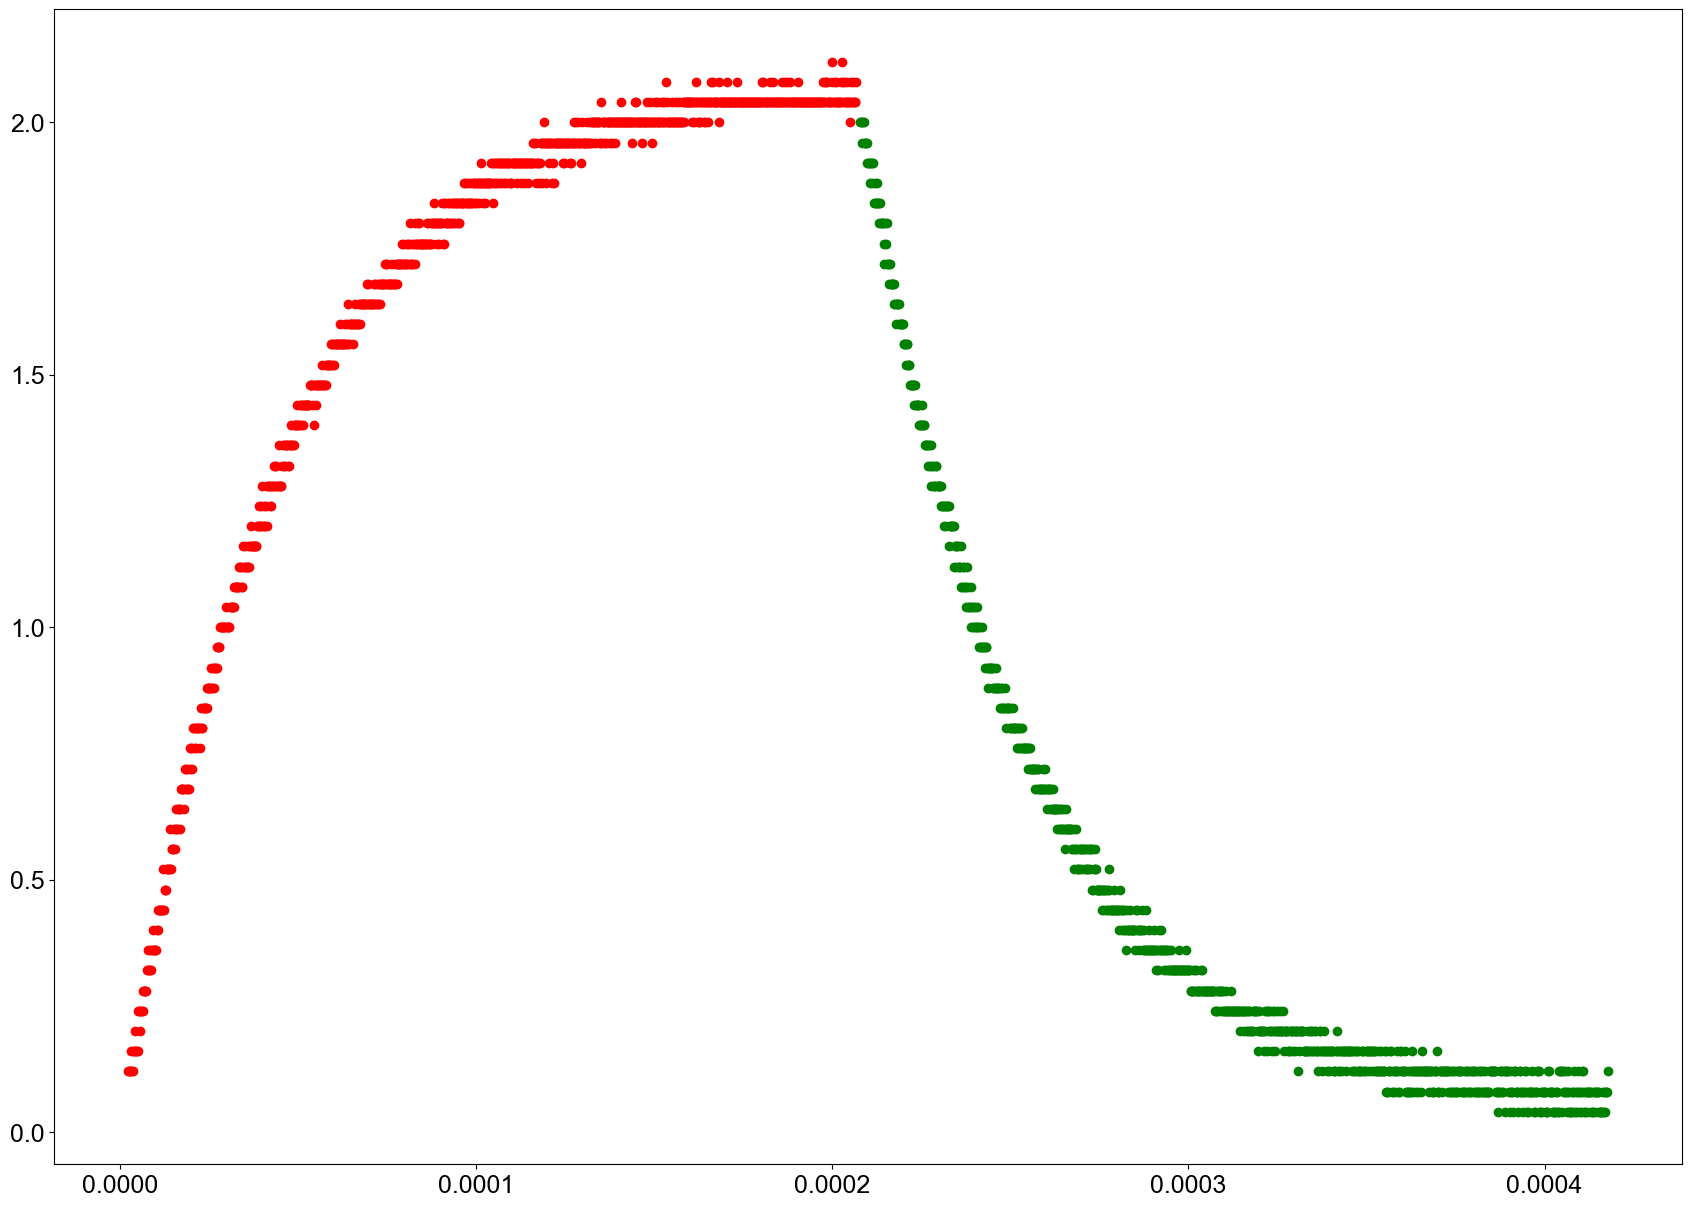

In [37]:
#plot charge (in red) and discharge (in green)
#plot as points
plt.plot(time_rc_charge, voltage_rc_charge, "r", marker="o", linestyle="None")
plt.plot(time_rc_discharge, voltage_rc_discharge, "g", marker="o", linestyle="None")

Text(0, 0.5, 'd.d.p [V]')

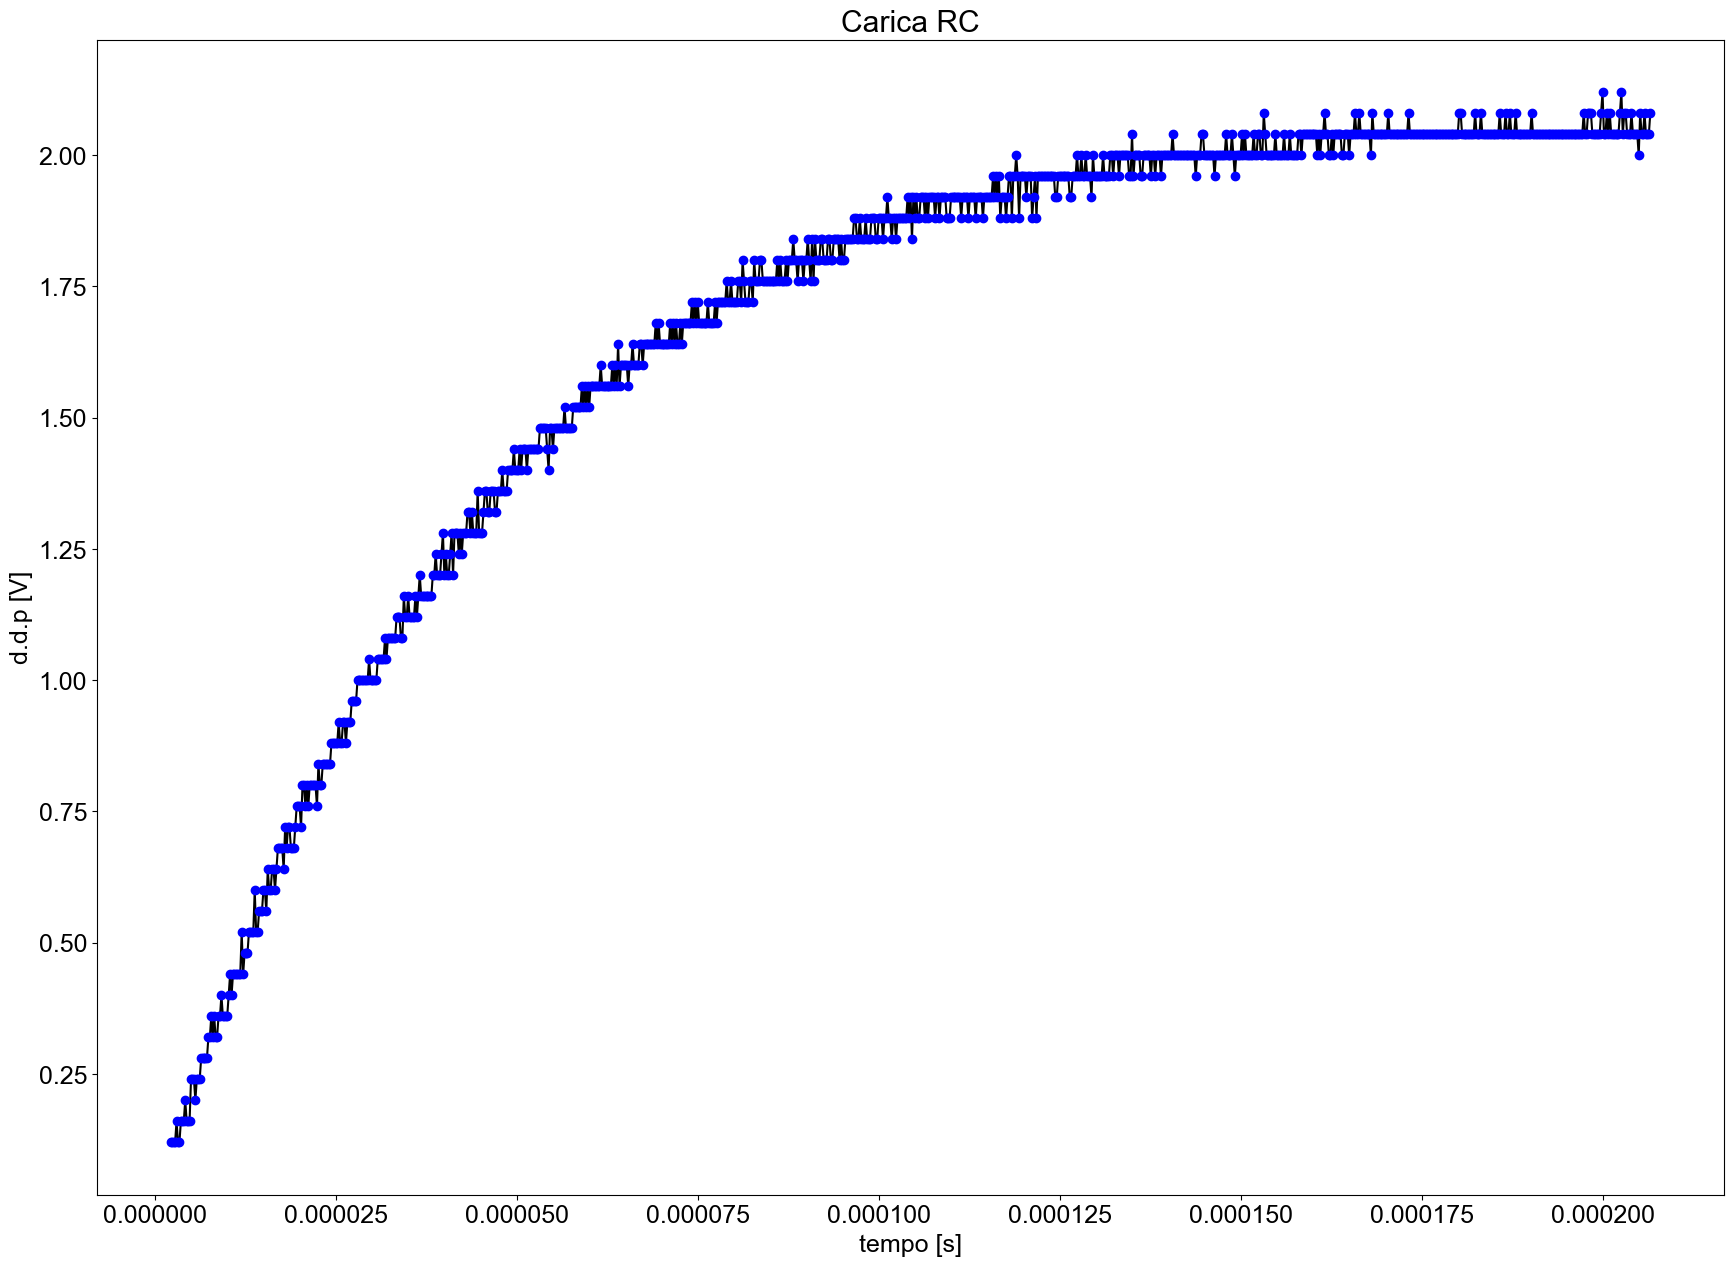

In [7]:
#plot just the charge with points and no line
#points in blue and line in black
plt.plot(time_rc_charge, voltage_rc_charge, "k")
plt.plot(time_rc_charge, voltage_rc_charge, "b", marker="o", linestyle="None")
#add a title
plt.title("Carica RC")
#add a label to the x axis
plt.xlabel("tempo [s]")
#add a label to the y axis
plt.ylabel("d.d.p [V]")

In [16]:
#create two pandas dataframes and save them as csv
data_rc_charge = pd.DataFrame({"t":time_rc_charge, "V":voltage_rc_charge})
data_rc_discharge = pd.DataFrame({"t":time_rc_discharge, "V":voltage_rc_discharge})
#save with index=False to avoid saving the index column
#data_rc_charge.to_csv("data/RC/charge.csv", index=False)
#data_rc_discharge.to_csv("data/RC/discharge.csv", index=False)

In [7]:
#discharge curve
def fit_discharge(t, V0, tau):
    return V0*(np.exp(lu.lmultiply(t, [-1 for i in range(len(t))])/(tau)))
#charge curve
def fit_charge(t, V0, tau):
    return V0*(1-np.exp(lu.lmultiply(t, [-1 for i in range(len(t))])/(tau)))


<ErrorbarContainer object of 3 artists>

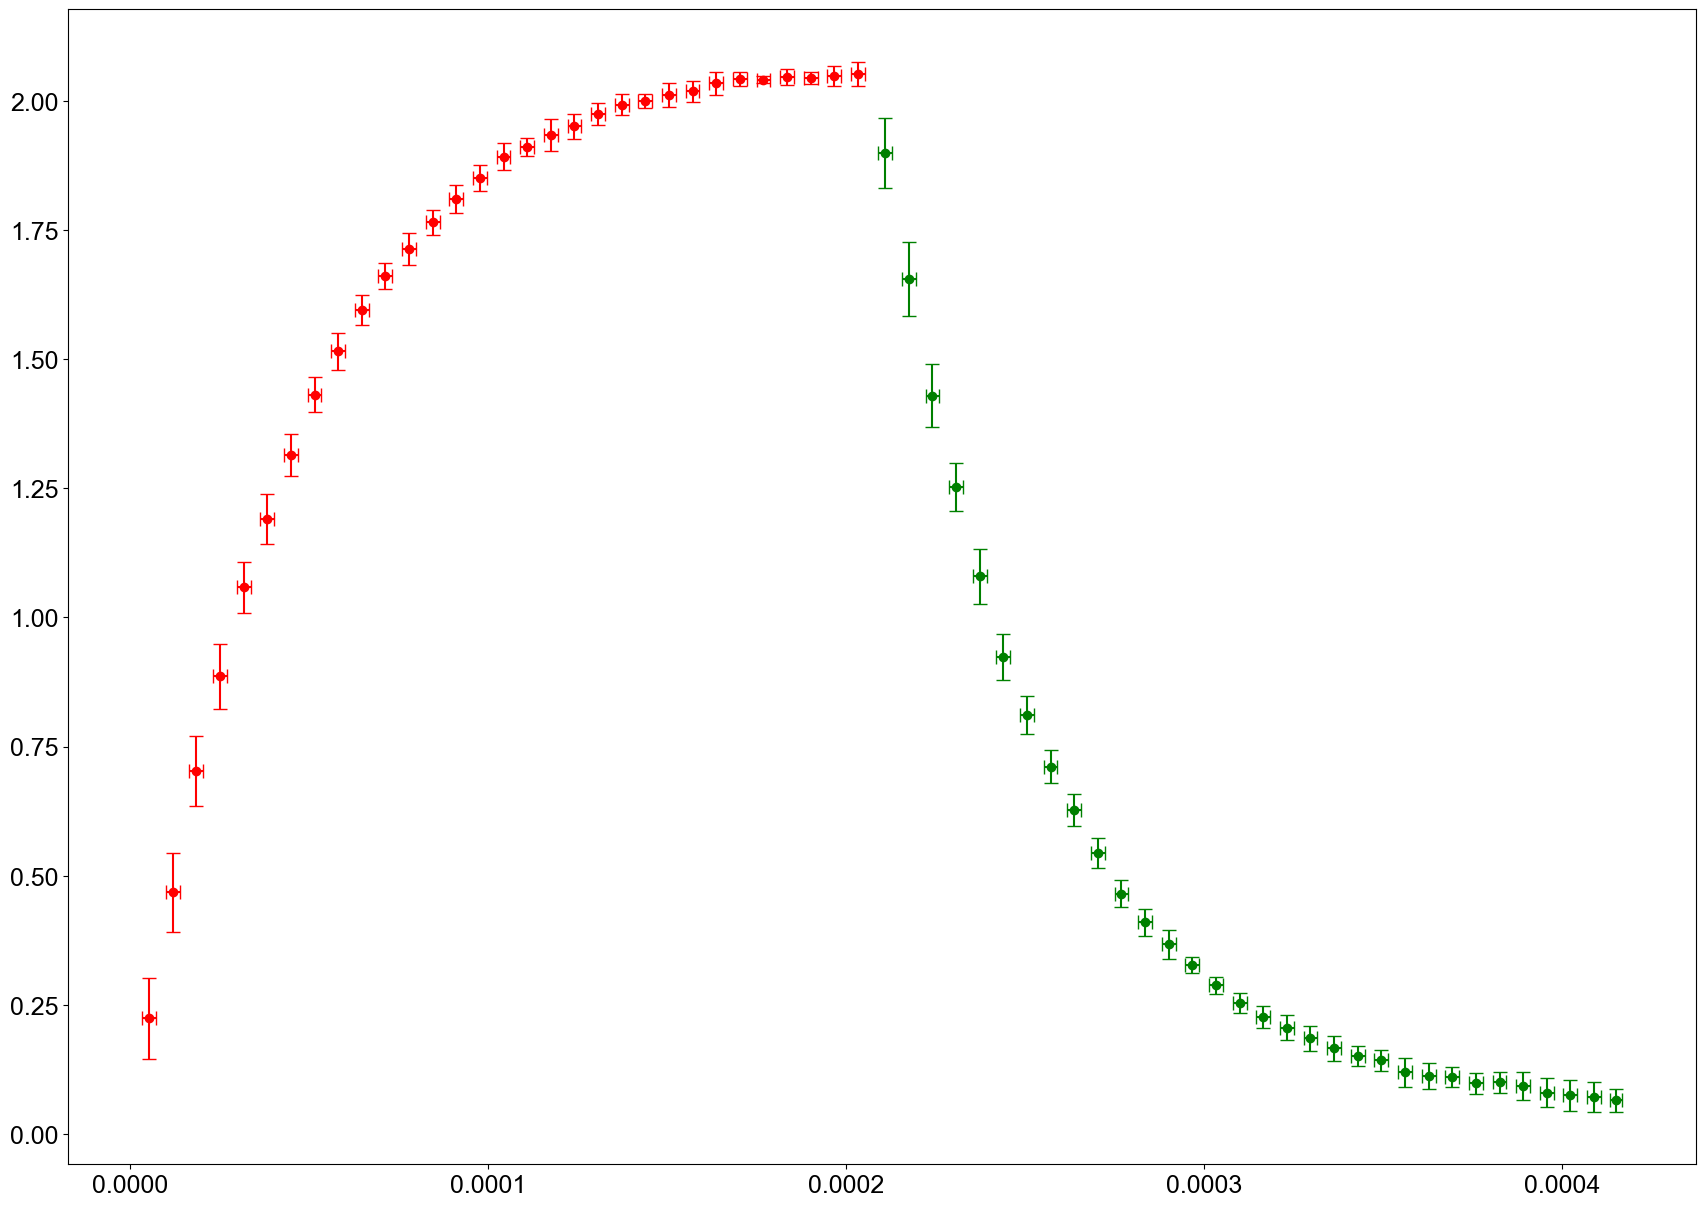

In [39]:
#cluster data
nop = 31
time_rc_charge_clust, voltage_rc_charge_clust, error_rc_charge_t_clust, error_rc_charge_v_clust = lu.simple_sampling(time_rc_charge, voltage_rc_charge, nop)
time_rc_discharge_clust, voltage_rc_discharge_clust, error_rc_discharge_t_clust, error_rc_discharge_v_clust = lu.simple_sampling(time_rc_discharge, voltage_rc_discharge, nop)
#plot as points with error bars
plt.errorbar(time_rc_charge_clust, voltage_rc_charge_clust, xerr=error_rc_charge_t_clust, yerr=error_rc_charge_v_clust, marker="o", linestyle="None", color="r")
plt.errorbar(time_rc_discharge_clust, voltage_rc_discharge_clust, xerr=error_rc_discharge_t_clust, yerr=error_rc_discharge_v_clust, marker="o", linestyle="None", color="g")


<ErrorbarContainer object of 3 artists>

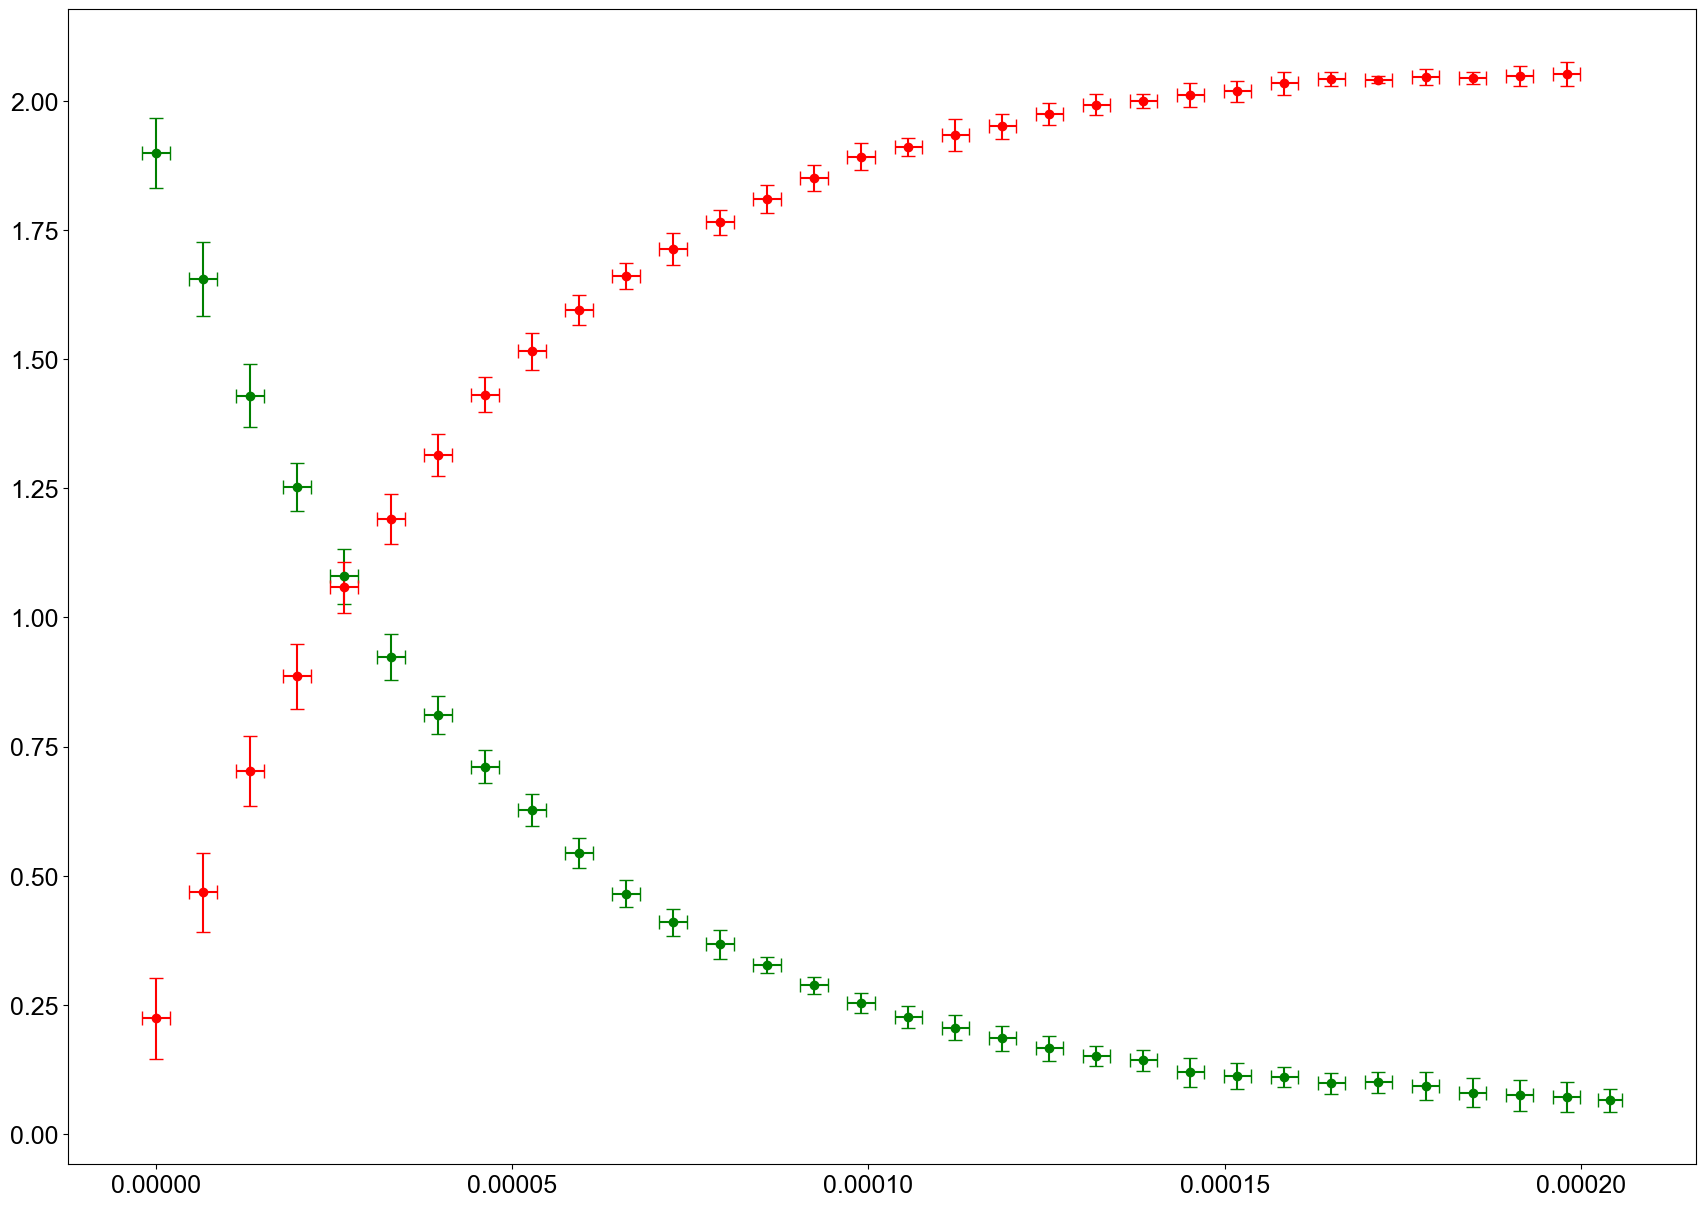

In [40]:
#shift the time of the charge and discharge curve to put it in the origin
time_rc_charge_clust = [t - time_rc_charge_clust[0] for t in time_rc_charge_clust]
time_rc_discharge_clust = [t - time_rc_discharge_clust[0] for t in time_rc_discharge_clust]
#plot
plt.errorbar(time_rc_discharge_clust, voltage_rc_discharge_clust, xerr=error_rc_discharge_t_clust, yerr=error_rc_discharge_v_clust, marker="o", linestyle="None", color="g")
plt.errorbar(time_rc_charge_clust, voltage_rc_charge_clust, xerr=error_rc_charge_t_clust, yerr=error_rc_charge_v_clust, marker="o", linestyle="None", color="r")

In [41]:
# Save elaborated data
data_rc_charge_clust = pd.DataFrame({"t":time_rc_charge_clust, "V":voltage_rc_charge_clust, "error_t":error_rc_charge_t_clust, "error_v":error_rc_charge_v_clust})
data_rc_discharge_clust = pd.DataFrame({"t":time_rc_discharge_clust, "V":voltage_rc_discharge_clust, "error_t":error_rc_discharge_t_clust, "error_v":error_rc_discharge_v_clust})
data_rc_charge_clust.to_csv("data/RC/charge_clust.csv", index=False)
data_rc_discharge_clust.to_csv("data/RC/discharge_clust.csv", index=False)

Text(0, 0.5, 'd.d.p [V]')

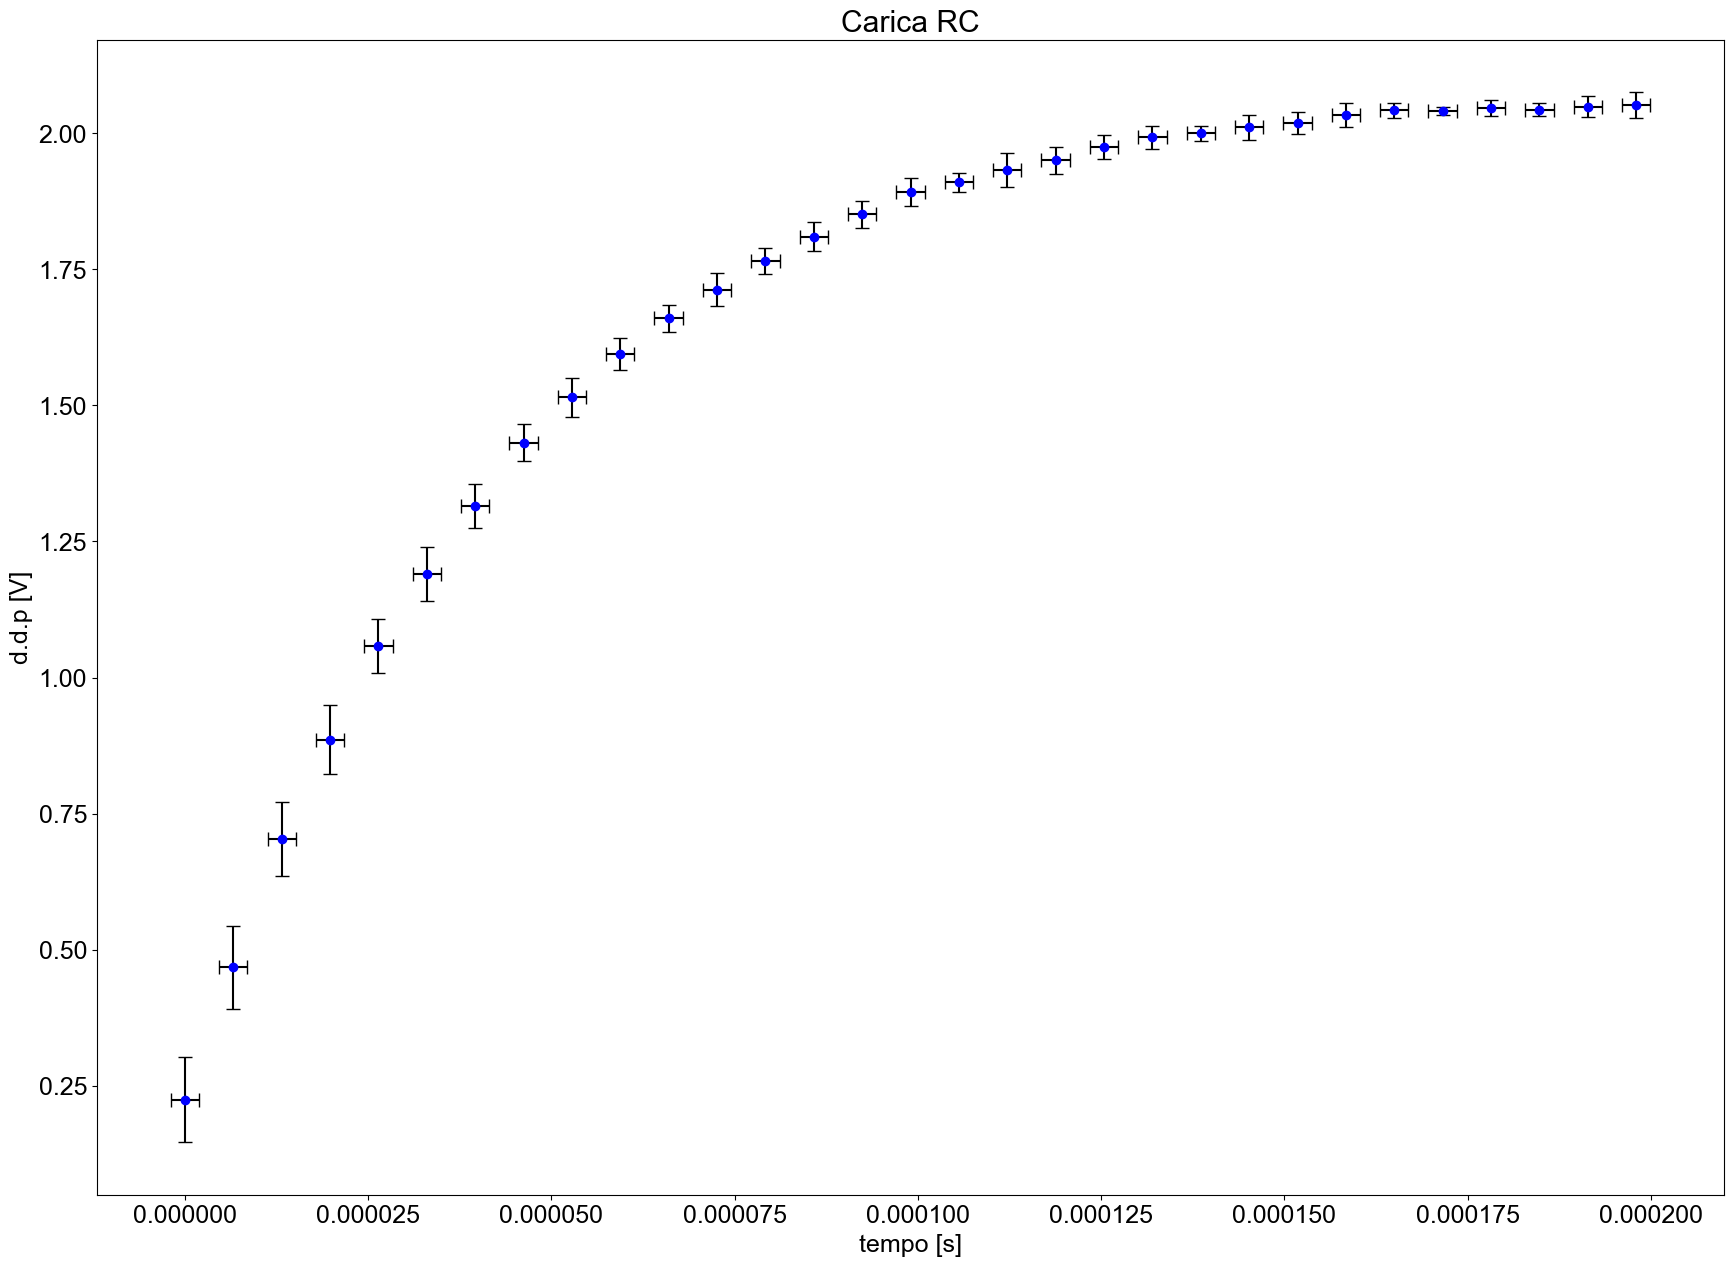

In [42]:
#plot clustered charge data with error bars
#points in blue and error bars in black
plt.errorbar(time_rc_charge_clust, voltage_rc_charge_clust, xerr=error_rc_charge_t_clust, yerr=error_rc_charge_v_clust, marker="o", linestyle="None", color="b", ecolor="k")
#add a title
plt.title("Carica RC")
#add a label to the x axis
plt.xlabel("tempo [s]")
#add a label to the y axis
plt.ylabel("d.d.p [V]")

t-test

In [63]:
"""
    \item $\tau_{carica} = (4.02 \pm 0.08) \cdot 10^{-5} \Omega F$
    \item $V_{g_{carica}} = (2.068 \pm 0.006) V$
    \item $\tau_{carica} = (5.2 \pm 0.1) \cdot 10^{-5} \Omega F$
    \item $V_{g_{carica}} = (1.78 \pm 0.04) V$

    \item $tau_{calculated} = (4.23 \pm 0.10) \cdot 10^{-5} \Omega F$
"""
#t-test on tau carica,scarica vs calculated tau
tau_calculated = 4.23e-5
error_tau_calculated = 0.10e-5
#charge
tau_carica = 4.02e-5
error_tau_carica = 0.08e-5
t = (tau_carica - tau_calculated)/np.sqrt(error_tau_carica**2 + error_tau_calculated**2)
p = stats.t.sf(np.abs(t), 2)
print("t-test on tau carica vs calculated tau: t = %f, p = %f" % (t, p))

#discharge
tau_scarica = 5.2e-5
error_tau_scarica = 0.1e-5
t = (tau_scarica - tau_calculated)/np.sqrt(error_tau_scarica**2 + error_tau_calculated**2)
p = stats.t.sf(np.abs(t), 2)
print("t-test on tau scarica vs calculated tau: t = %f, p = %f" % (t, p))

t-test on tau carica vs calculated tau: t = -1.639824, p = 0.121360
t-test on tau scarica vs calculated tau: t = 6.858936, p = 0.010301


In [66]:
print(stats.t.sf(1.63, 1))

0.1751610446541856


## Circuito RL

In [43]:

data_rl = pd.read_csv("data/RL/F0000CH2.csv")
data_rl_gen = pd.read_csv("data/RL/F0000CH1.csv")

#remove first 18 lines
data_rl = data_rl.iloc[18:]
data_rl_gen = data_rl_gen.iloc[18:]
#remove first 3 columns and last one
data_rl = data_rl.iloc[:, 3:-1]
data_rl_gen = data_rl_gen.iloc[:, 3:-1]
#rename columns, first column is time second is voltage
data_rl.columns = ["time", "voltage"]
data_rl_gen.columns = ["time", "voltage"]


Text(0, 0.5, 'tensione [V]')

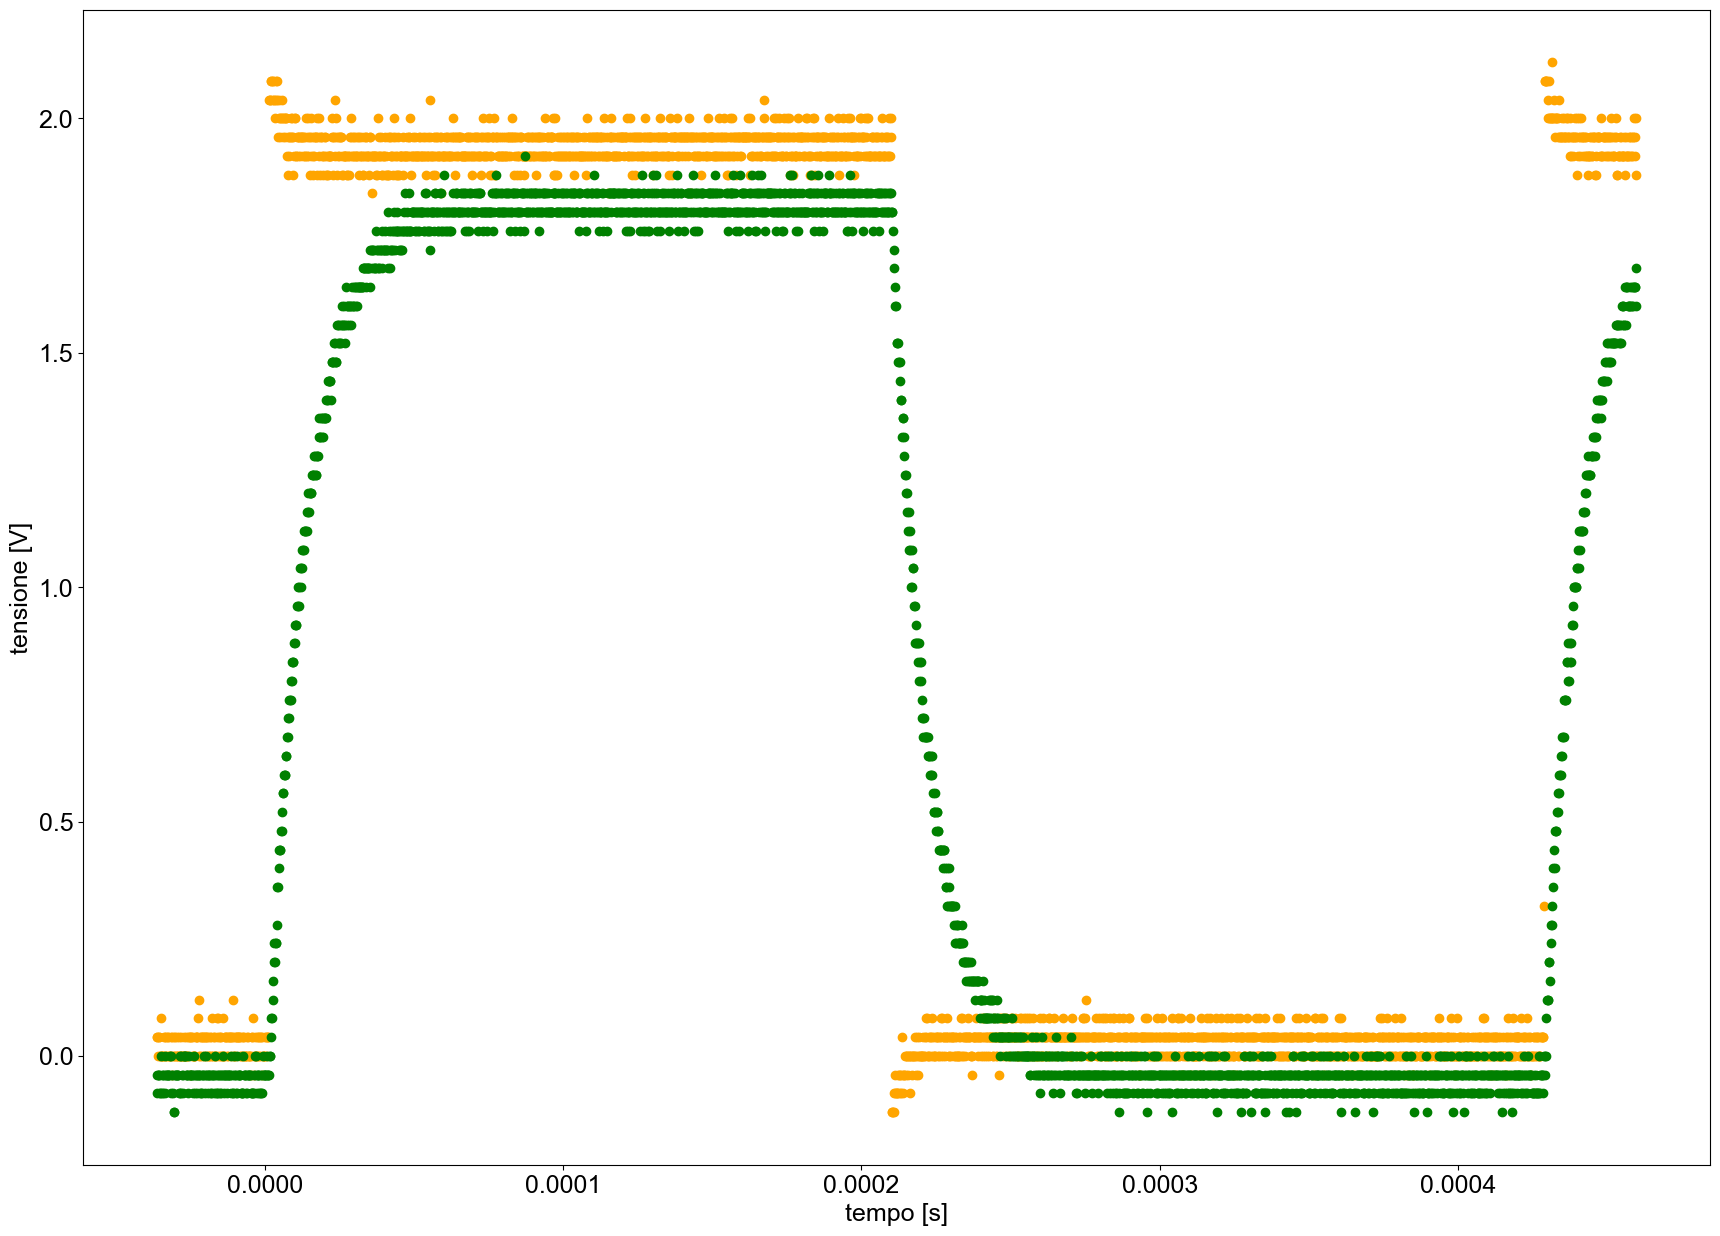

In [44]:
#difference between rl and rl_gen in a new dataframe
data_rl_diff = pd.DataFrame({"time":data_rl["time"], "voltage":data_rl["voltage"]-data_rl_gen["voltage"]})
#plot difference
#plt.plot(data_rl_diff["time"], data_rl_diff["voltage"], "y")
#plot rl_gen
plt.plot(data_rl_gen["time"], data_rl_gen["voltage"], "orange", label="generatore", linestyle="none", marker="o")
#plot rl
plt.plot(data_rl["time"], data_rl["voltage"], "g", label="d.d.p. ai capi dell'induttore", linestyle="none", marker="o")

#add labels
plt.xlabel("tempo [s]")
plt.ylabel("tensione [V]")

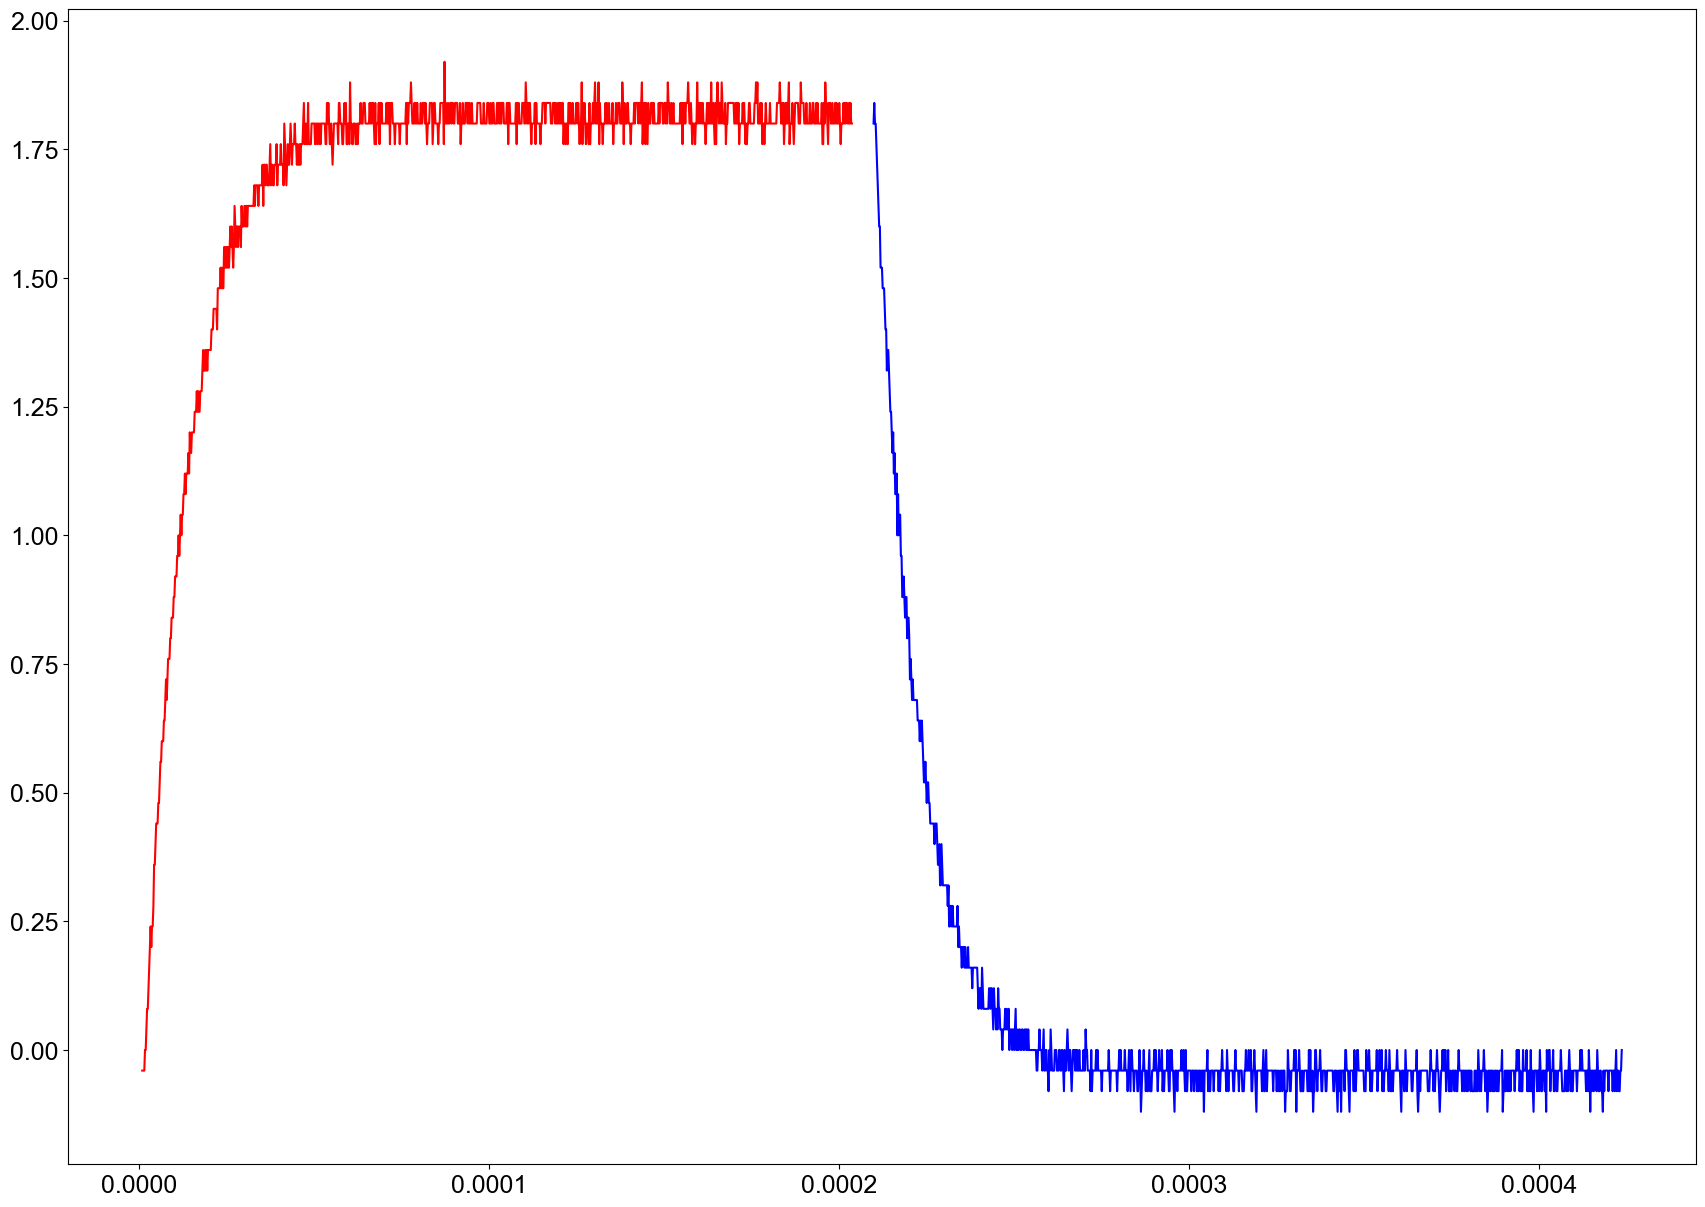

In [45]:
#divide data in charge and discharge
time_rl_charge = data_rl["time"][185:1200]
voltage_rl_charge = data_rl["voltage"][185:1200]

time_rl_discharge = data_rl["time"][1230:2300]
voltage_rl_discharge = data_rl["voltage"][1230:2300]
#plot
plt.plot(time_rl_charge, voltage_rl_charge, "r")
plt.plot(time_rl_discharge, voltage_rl_discharge, "b")

<ErrorbarContainer object of 3 artists>

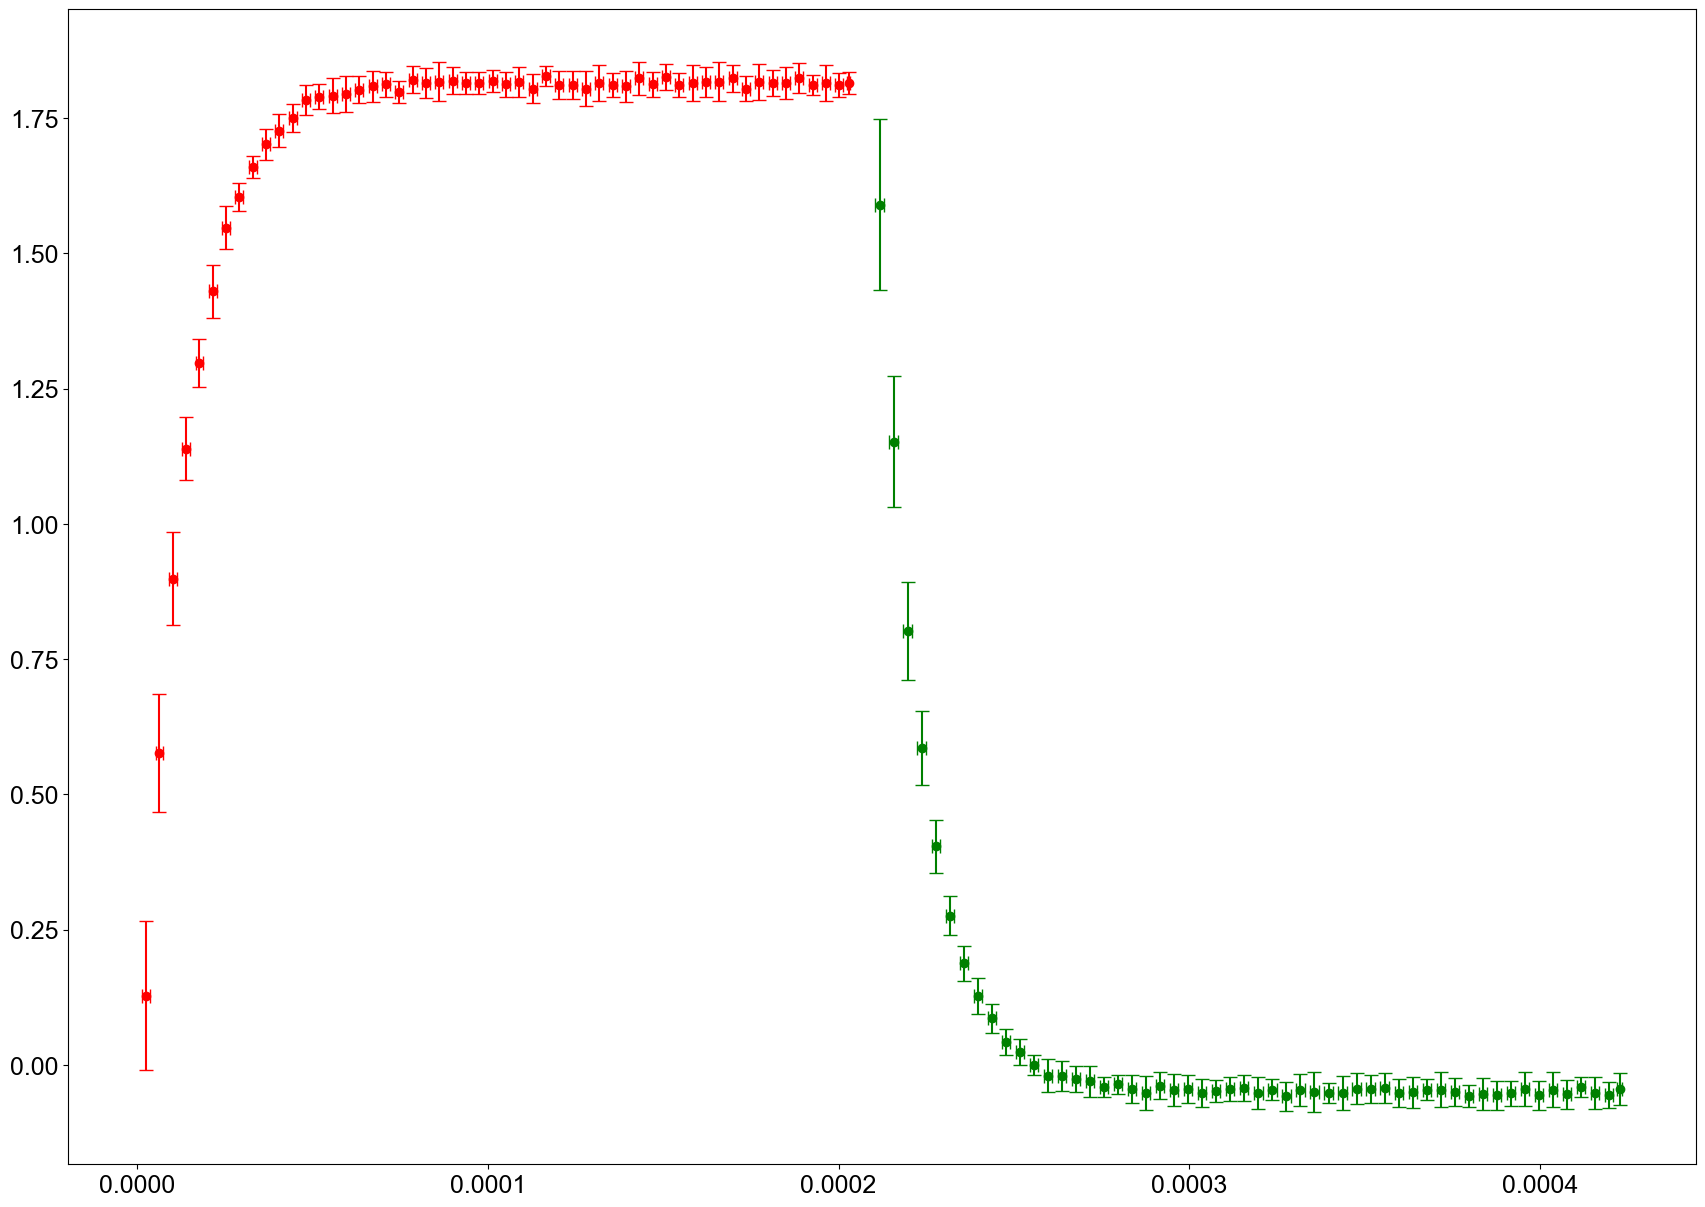

In [50]:
#cluster data
nop = 51
time_rl_charge_clust, voltage_rl_charge_clust, error_rl_charge_t_clust, error_rl_charge_v_clust = lu.simple_sampling(time_rl_charge, voltage_rl_charge, nop)
time_rl_discharge_clust, voltage_rl_discharge_clust, error_rl_discharge_t_clust, error_rl_discharge_v_clust = lu.simple_sampling(time_rl_discharge, voltage_rl_discharge, nop)
#plot as points with error bars
plt.errorbar(time_rl_charge_clust, voltage_rl_charge_clust, xerr=error_rl_charge_t_clust, yerr=error_rl_charge_v_clust, marker="o", linestyle="None", color="r")
plt.errorbar(time_rl_discharge_clust, voltage_rl_discharge_clust, xerr=error_rl_discharge_t_clust, yerr=error_rl_discharge_v_clust, marker="o", linestyle="None", color="g")

<ErrorbarContainer object of 3 artists>

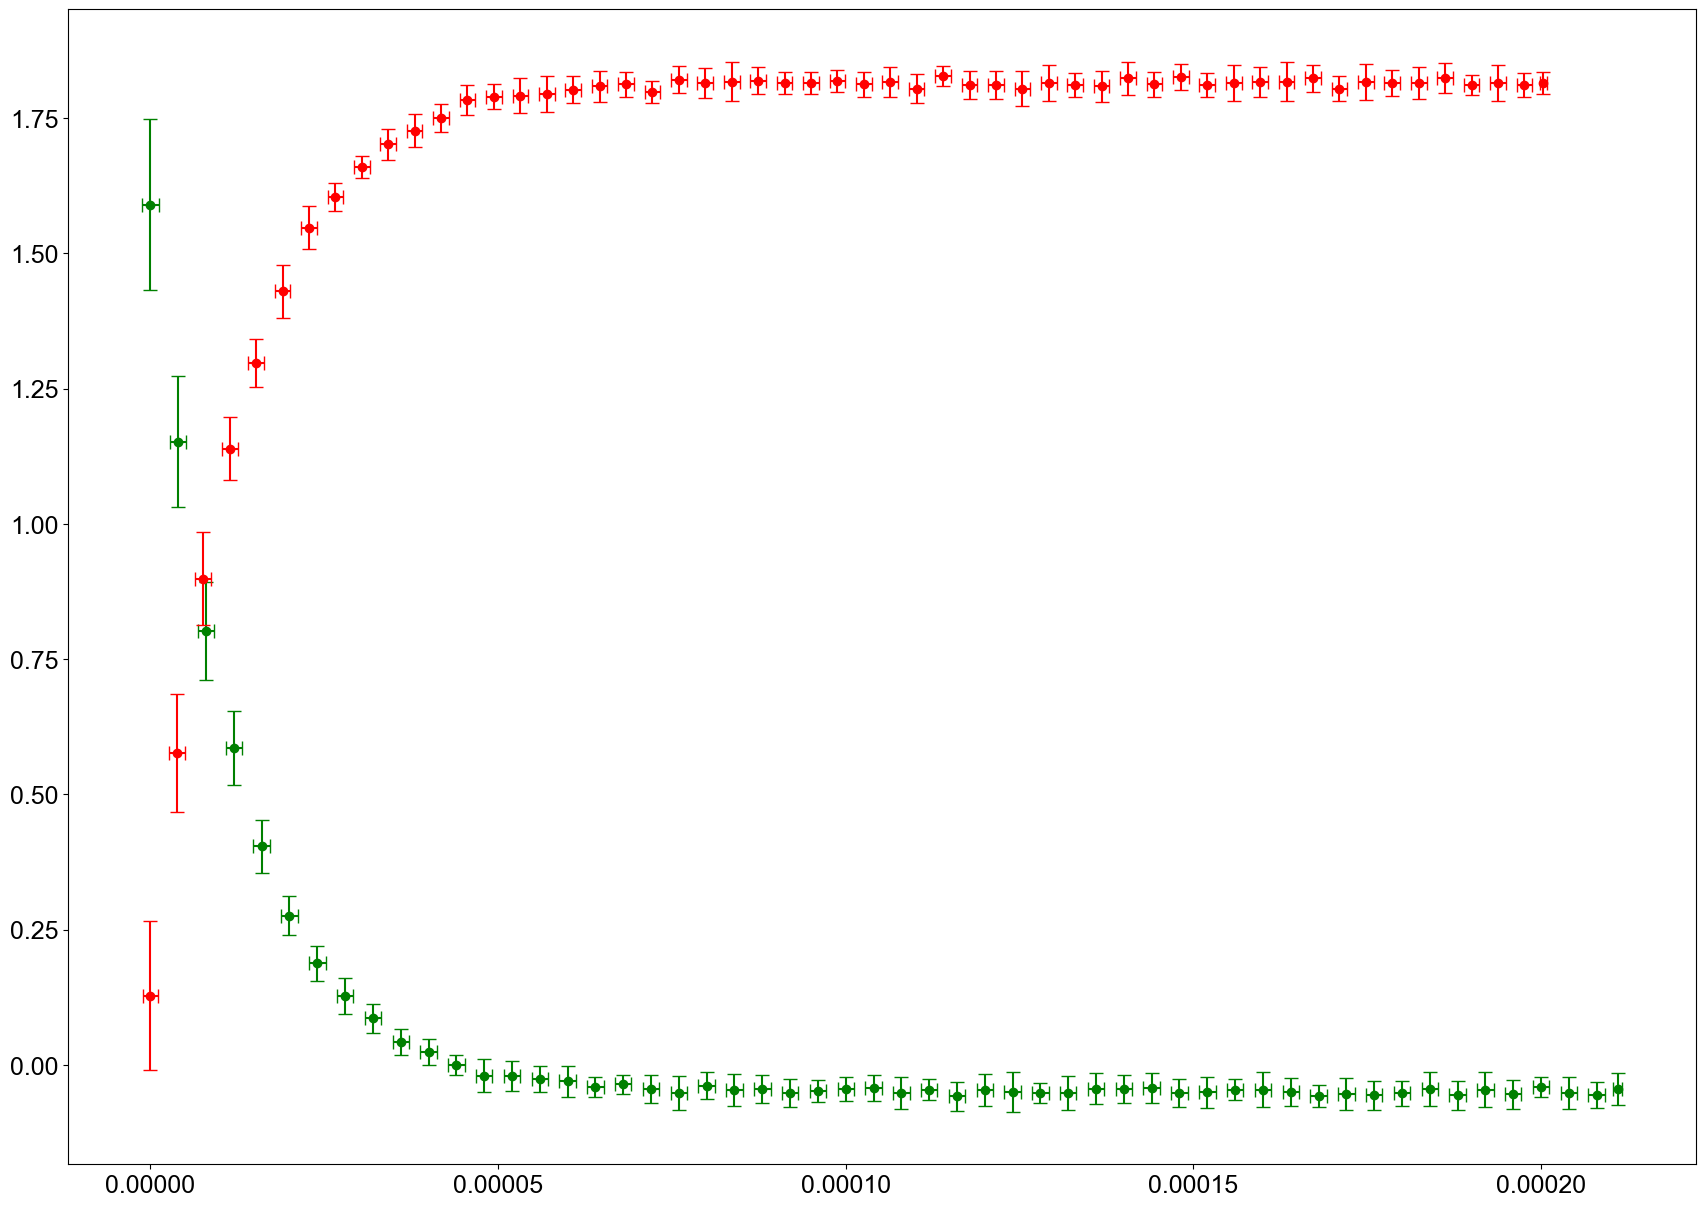

In [51]:
#shift the time of the charge and discharge curve to put it in the origin
time_rl_charge_clust = [t - time_rl_charge_clust[0] for t in time_rl_charge_clust]
time_rl_discharge_clust = [t - time_rl_discharge_clust[0] for t in time_rl_discharge_clust]
#plot
plt.errorbar(time_rl_discharge_clust, voltage_rl_discharge_clust, xerr=error_rl_discharge_t_clust, yerr=error_rl_discharge_v_clust, marker="o", linestyle="None", color="g")
plt.errorbar(time_rl_charge_clust, voltage_rl_charge_clust, xerr=error_rl_charge_t_clust, yerr=error_rl_charge_v_clust, marker="o", linestyle="None", color="r")

In [52]:
# Save elaborated data
data_rl_charge_clust = pd.DataFrame({"t":time_rl_charge_clust, "V":voltage_rl_charge_clust, "error_t":error_rl_charge_t_clust, "error_v":error_rl_charge_v_clust})
data_rl_discharge_clust = pd.DataFrame({"t":time_rl_discharge_clust, "V":voltage_rl_discharge_clust, "error_t":error_rl_discharge_t_clust, "error_v":error_rl_discharge_v_clust})
data_rl_charge_clust.to_csv("data/RL/charge_clust.csv", index=False)
data_rl_discharge_clust.to_csv("data/RL/discharge_clust.csv", index=False)

<ErrorbarContainer object of 3 artists>

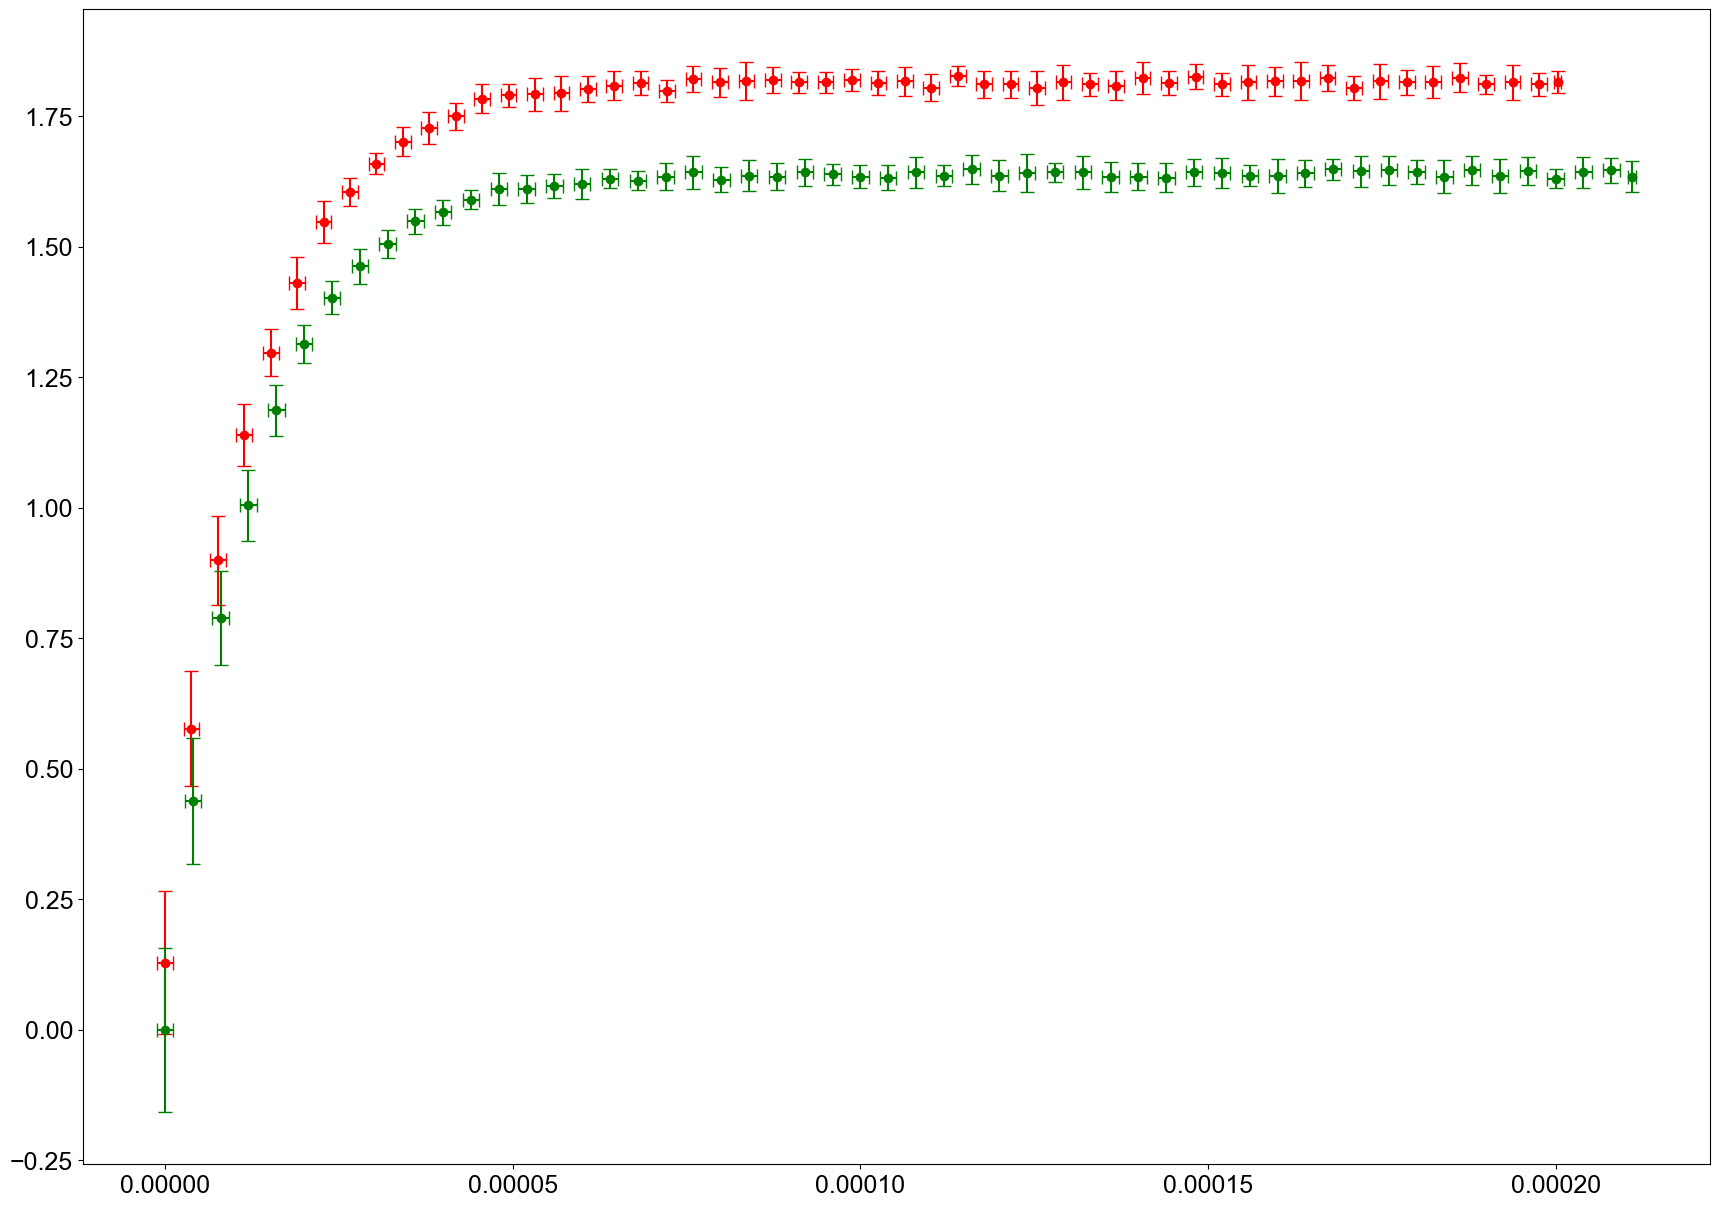

In [60]:
#try to plot discharge inverted to see if it's similar to charge
inv_voltage_rl_discharge_clust = [-v for v in voltage_rl_discharge_clust]
#shift up the discharge curve to put it in the origin
inv_voltage_rl_discharge_clust = [v - inv_voltage_rl_discharge_clust[0] for v in inv_voltage_rl_discharge_clust]
plt.errorbar(time_rl_charge_clust, voltage_rl_charge_clust, xerr=error_rl_charge_t_clust, yerr=error_rl_charge_v_clust, marker="o", linestyle="None", color="r")
plt.errorbar(time_rl_discharge_clust, inv_voltage_rl_discharge_clust, xerr=error_rl_discharge_t_clust, yerr=error_rl_discharge_v_clust, marker="o", linestyle="None", color="g")

In [14]:
def RL_charge_function(t,tau,V0):
    return V0*(1-np.exp(-t/tau))

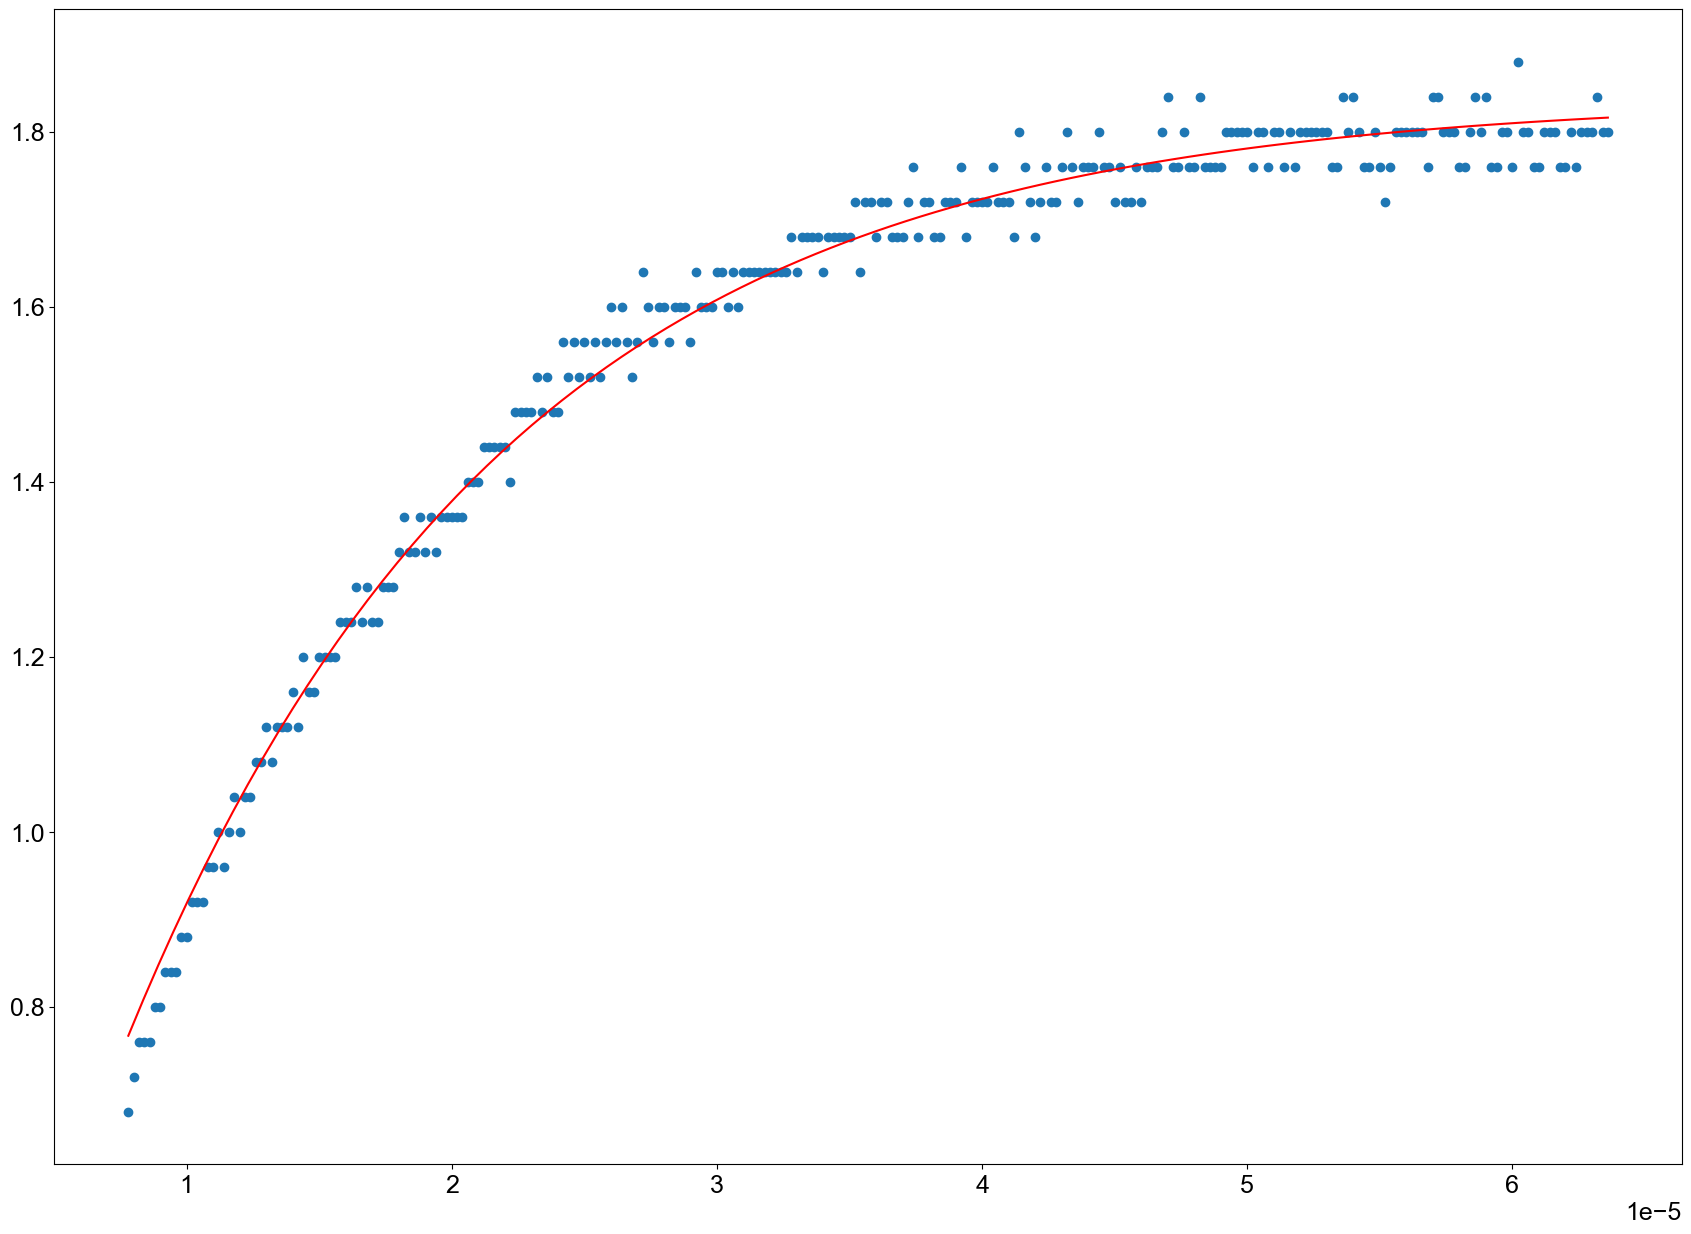

In [15]:
#fit the data
popt, pcov = curve_fit(RL_charge_function, time_1, voltage_1)
#plot the fit
RL_linspace = np.linspace(time_1[0], time_1[-1], 100)
hyp_fit = [RL_charge_function(t,*popt) for t in RL_linspace]
plt.plot(time_1,voltage_1,"o")
plt.plot(RL_linspace,hyp_fit,"r-")

In [16]:
R = 900
C = 47e-9
#print the fit parameters
print("tau = ",popt[0],"I0 = ",popt[1])
#tau = L/R
L = popt[0]*R
print("L = ",L)

tau =  1.4454934461799899e-05 I0 =  1.838568256573971
L =  0.013009441015619908


In [9]:
L = 0.013009441015619908
R = 900
C = 47e-9
gamma = R/(2*L)
w_0 = 1/np.sqrt(L*C)
print("gamma = ",gamma)
print("w_0 = ",w_0)

gamma =  34590.26405974732
w_0 =  40440.98759924438


In [14]:
#L = 0.013009441015619908
L = 0.01098
R = 900
C = 47e-9
gamma = R/(2*L)
w_0 = 1/(np.sqrt(L*C))
print(1/(L*C))
print("gamma = ",gamma)
print("w_0 = ",w_0)

gamma =  40983.60655737705
w_0 =  44019.98608915835


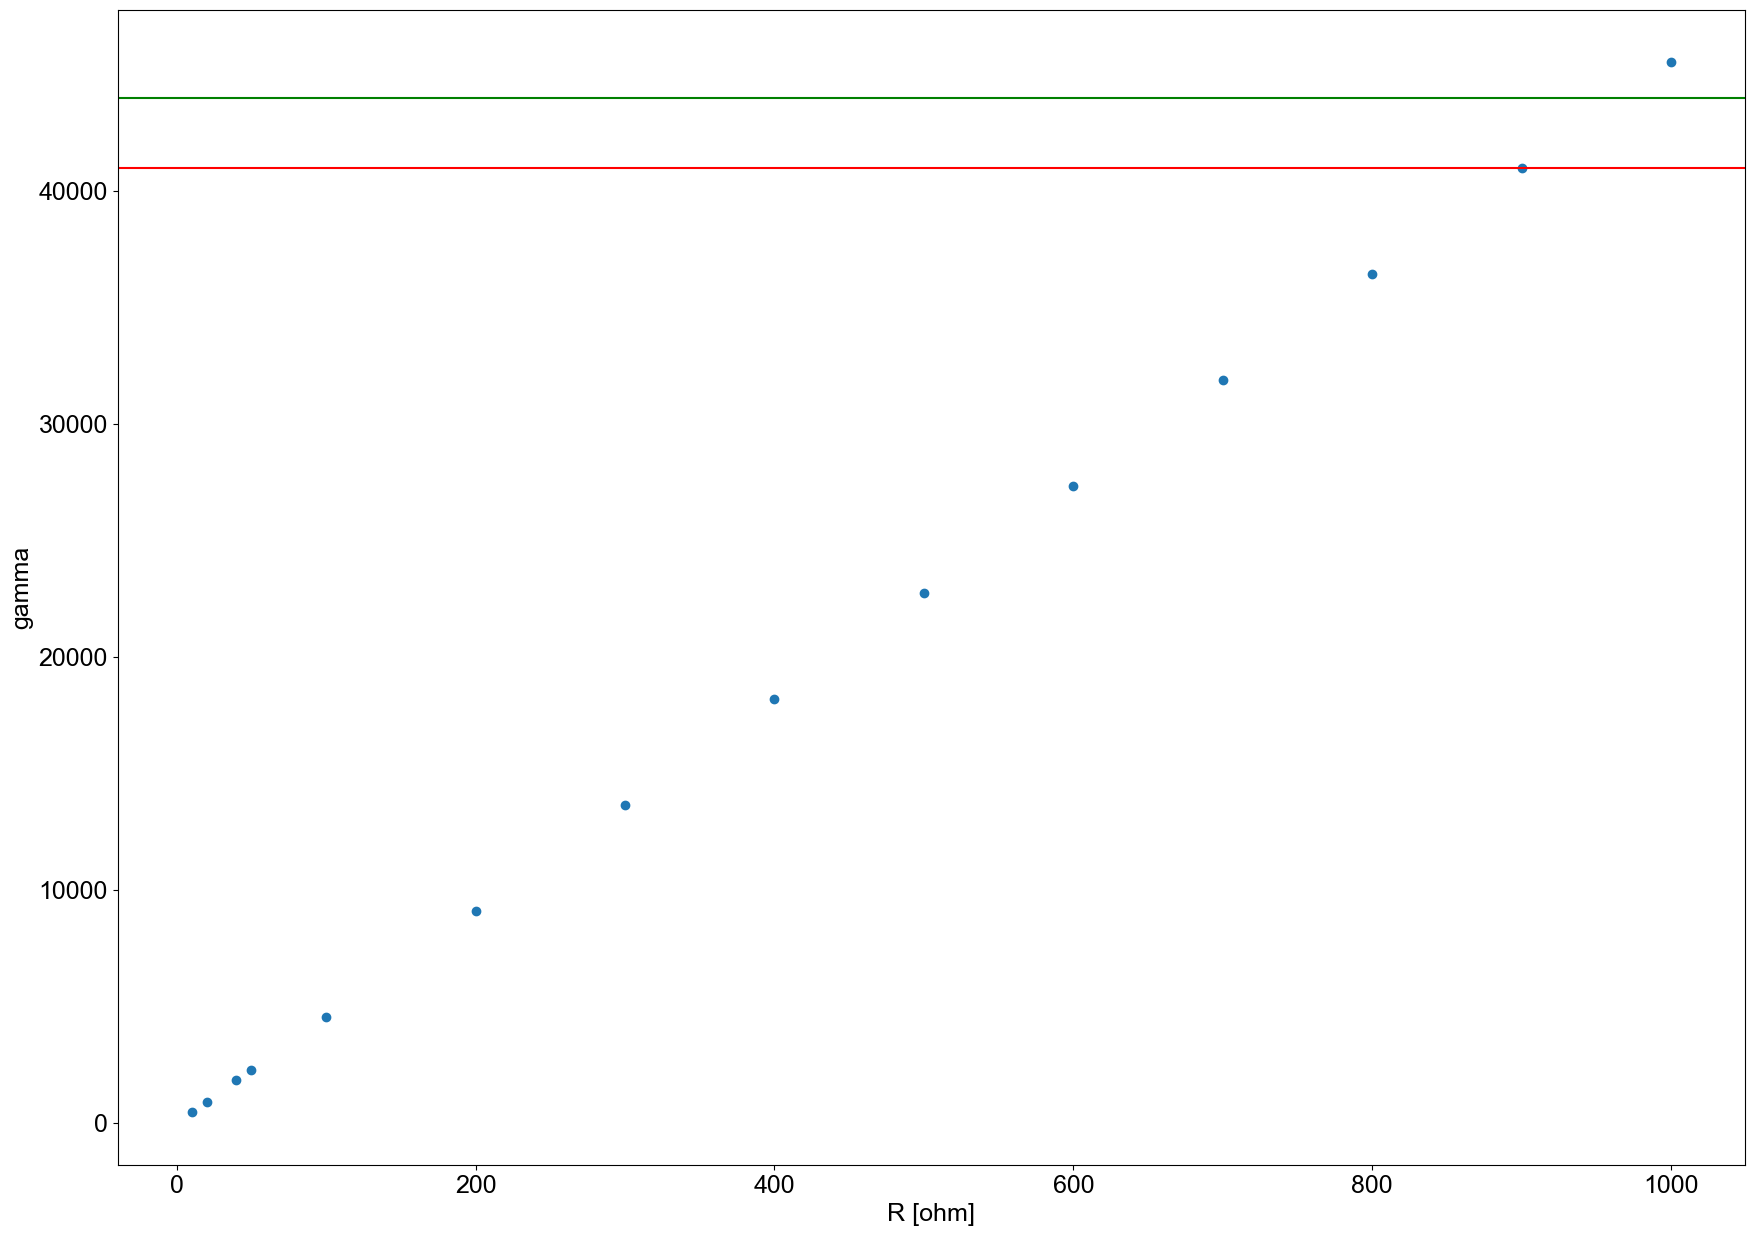

In [13]:
#calculate a range of gamma values
R_list = [10, 20 , 40, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
gamma_list = [R/(2*L) for R in R_list]
#plot R vs gamma
plt.plot(R_list,gamma_list,"o")
plt.xlabel("R [ohm]")
plt.ylabel("gamma")
#plot orizzontal line at w_0
plt.axhline(y=gamma, color='r', linestyle='-')
plt.axhline(y=w_0, color='g', linestyle='-')

In [17]:
#print gamma at R=100
print("gamma at R=100: ",gamma_list[4])
beta_100 = np.sqrt(w_0**2 - gamma_list[4]**2)
print("beta at R=100: ",beta_100)

gamma at R=100:  4553.734061930783
beta at R=100:  43783.81757433797


In [19]:
#function for V(t) for RLC circuit
#under damped case
def V_under_damped(t,gamma,omega,R,C, V0):
    Vt = R*C*V0*np.exp(-gamma*t)*(gamma*np.cos(omega*t)+omega*np.sin(omega*t))
    return Vt

Text(0, 0.5, 'V(t)')

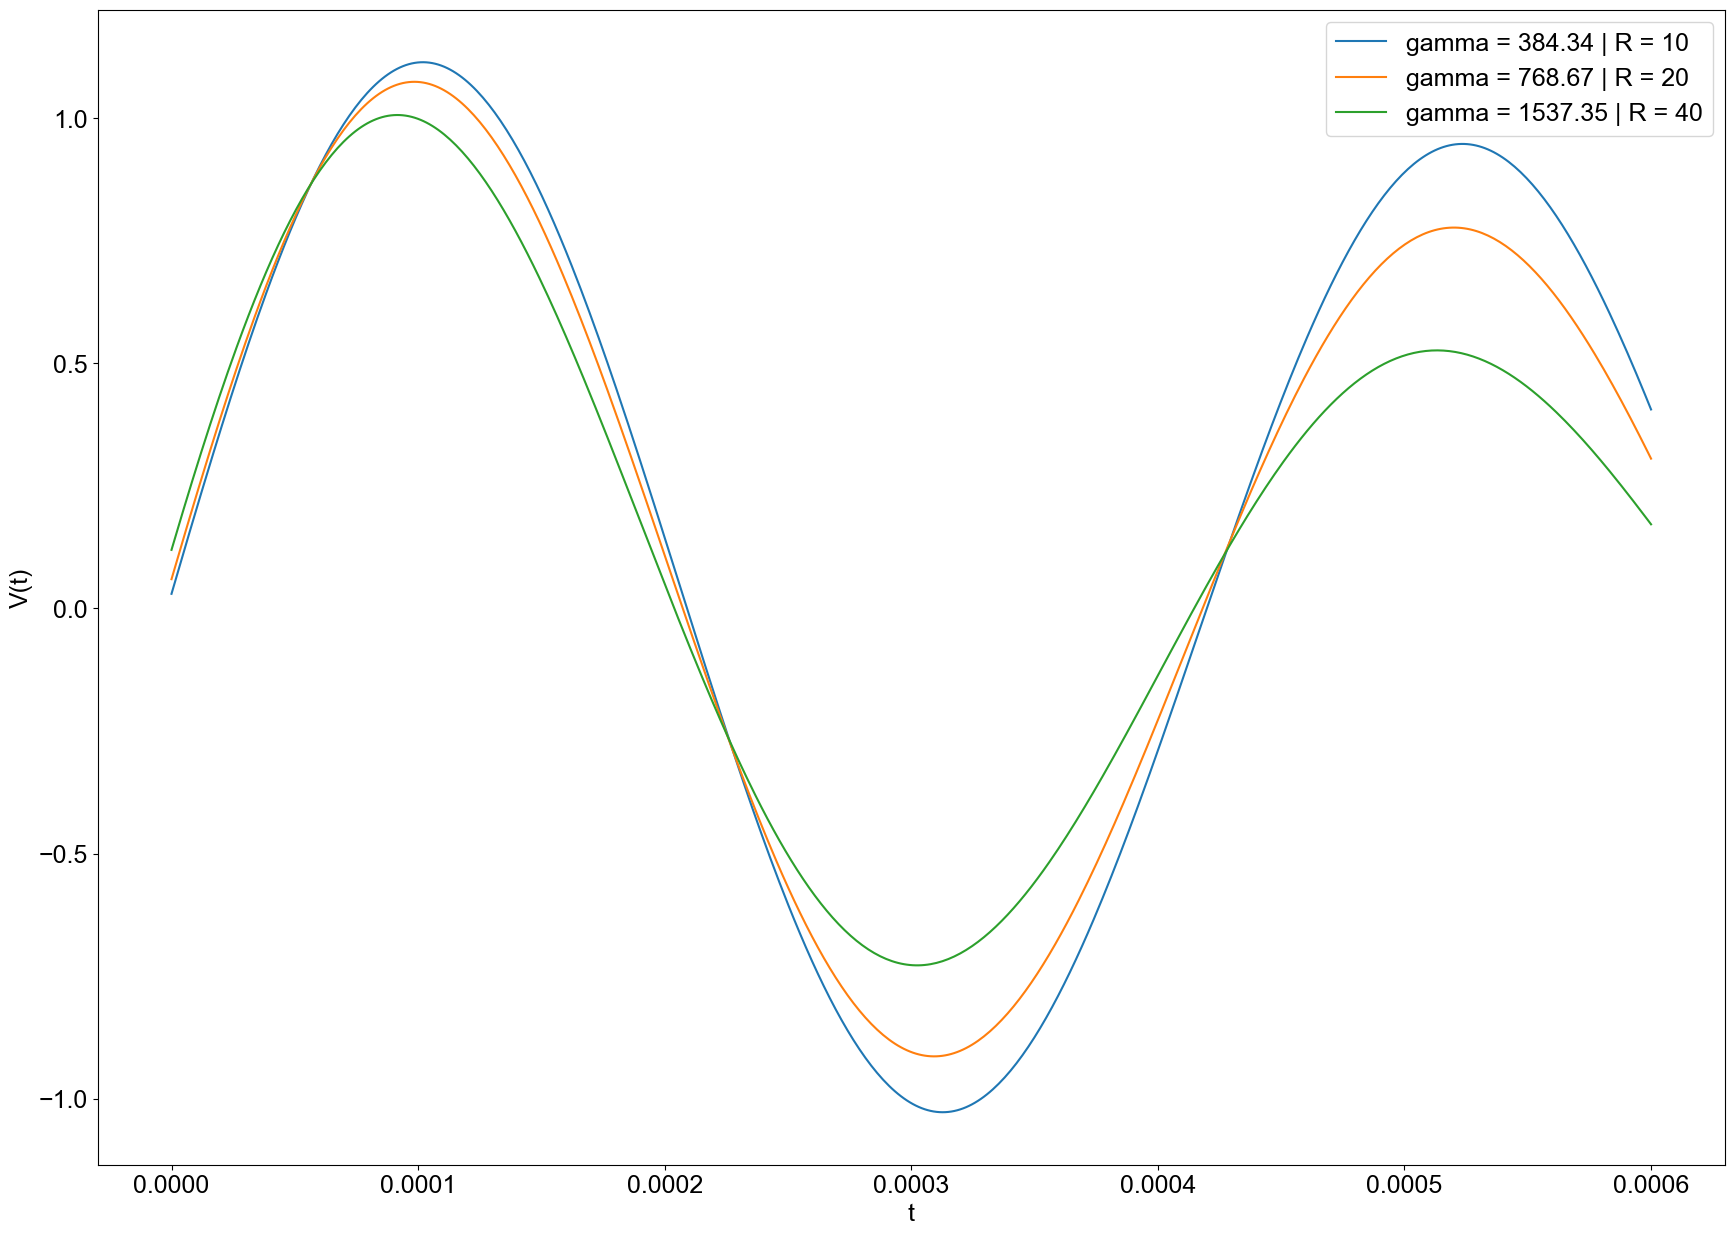

In [20]:
#plot V(t) for RLC circuit for different gamma values
w = (2*np.pi)*2.372e3
#use subplots to plot multiple graphs
fig, ax = plt.subplots()
RLC_linspace = np.linspace(0, 6e-4, 500)
for g in gamma_list[0:3]:
    V_t = [V_under_damped(t,g,w,R,C, popt[1]) for t in RLC_linspace]
    #put lable with gamma value
    ax.plot(RLC_linspace,V_t,label="gamma = "+ f"{g:.2f} | " + "R = "+ f"{R_list[gamma_list.index(g)]:.0f}")
ax.legend()
ax.set_xlabel("t")
ax.set_ylabel("V(t)")


### Analisi dati circuito RLC

In [3]:
#load RLC data
sovrasmorzato_CH1 = pd.read_csv("data/RLC/sovrasmorzato/F0002CH1.CSV")
sovrasmorzato_CH1 = sovrasmorzato_CH1.iloc[18:,3:-1]
sovrasmorzato_CH1.columns = ["t","V"]
sovrasmorzato_CH2 = pd.read_csv("data/RLC/sovrasmorzato/F0002CH2.CSV")
sovrasmorzato_CH2 = sovrasmorzato_CH2.iloc[18:,3:-1]
sovrasmorzato_CH2.columns = ["t","V"]
criticamente_smorzato_CH1 = pd.read_csv("data/RLC/smorzamentocritico/F0001CH1.CSV")
criticamente_smorzato_CH1 = criticamente_smorzato_CH1.iloc[18:,3:-1]
criticamente_smorzato_CH1.columns = ["t","V"]
criticamente_smorzato_CH2 = pd.read_csv("data/RLC/smorzamentocritico/F0001CH2.CSV")
criticamente_smorzato_CH2 = criticamente_smorzato_CH2.iloc[18:,3:-1]
criticamente_smorzato_CH2.columns = ["t","V"]
sottosmorzato_CH1 = pd.read_csv("data/RLC/sottosmorzato/F0000CH1.CSV")
sottosmorzato_CH1 = sottosmorzato_CH1.iloc[18:,3:-1]
sottosmorzato_CH1.columns = ["t","V"]
sottosmorzato_CH2 = pd.read_csv("data/RLC/sottosmorzato/F0000CH2.CSV")
sottosmorzato_CH2 = sottosmorzato_CH2.iloc[18:,3:-1]
sottosmorzato_CH2.columns = ["t","V"]

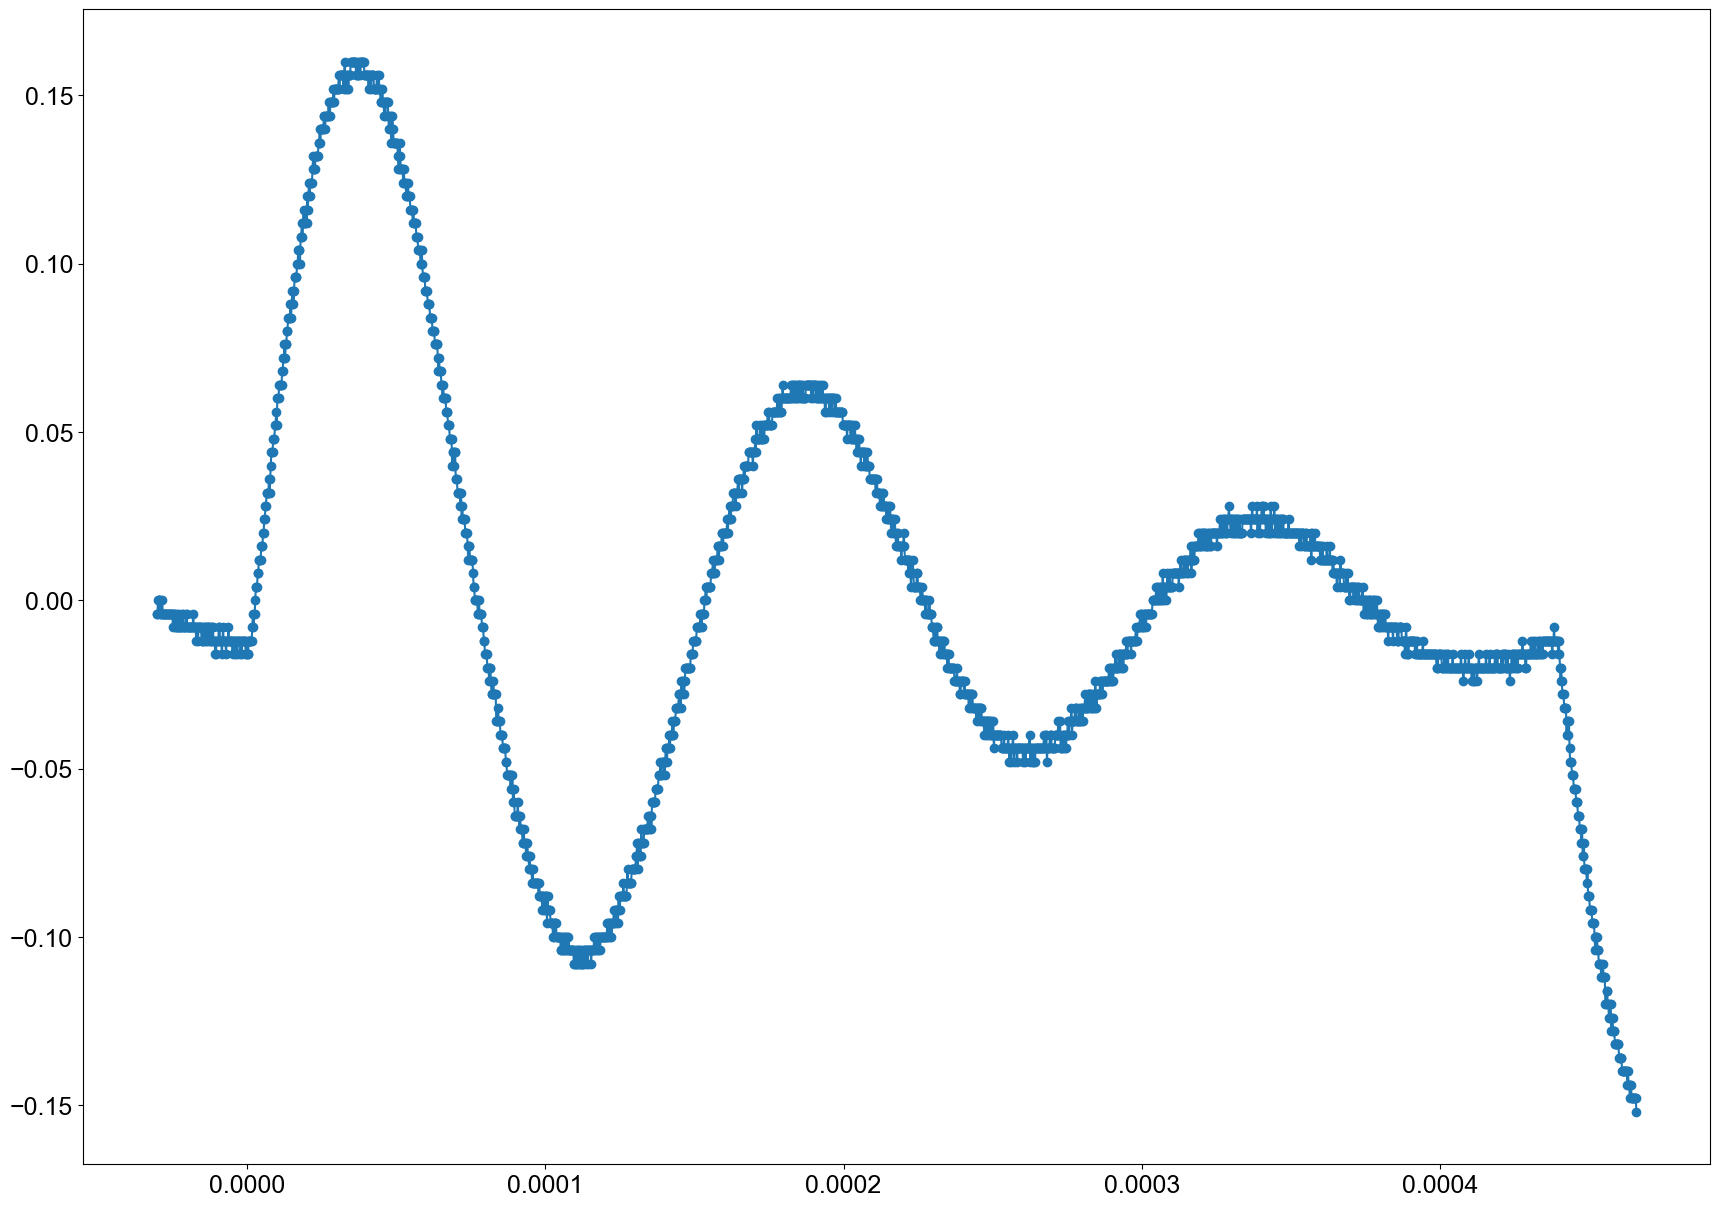

In [9]:
#plot sotto smorzato
#remove first 18 rows
sottosmorzato_CH1_test = sottosmorzato_CH1.iloc[0:,:]
plt.plot(sottosmorzato_CH2["t"],sottosmorzato_CH2["V"], "o-")

Text(0, 0.5, 'V(t)')

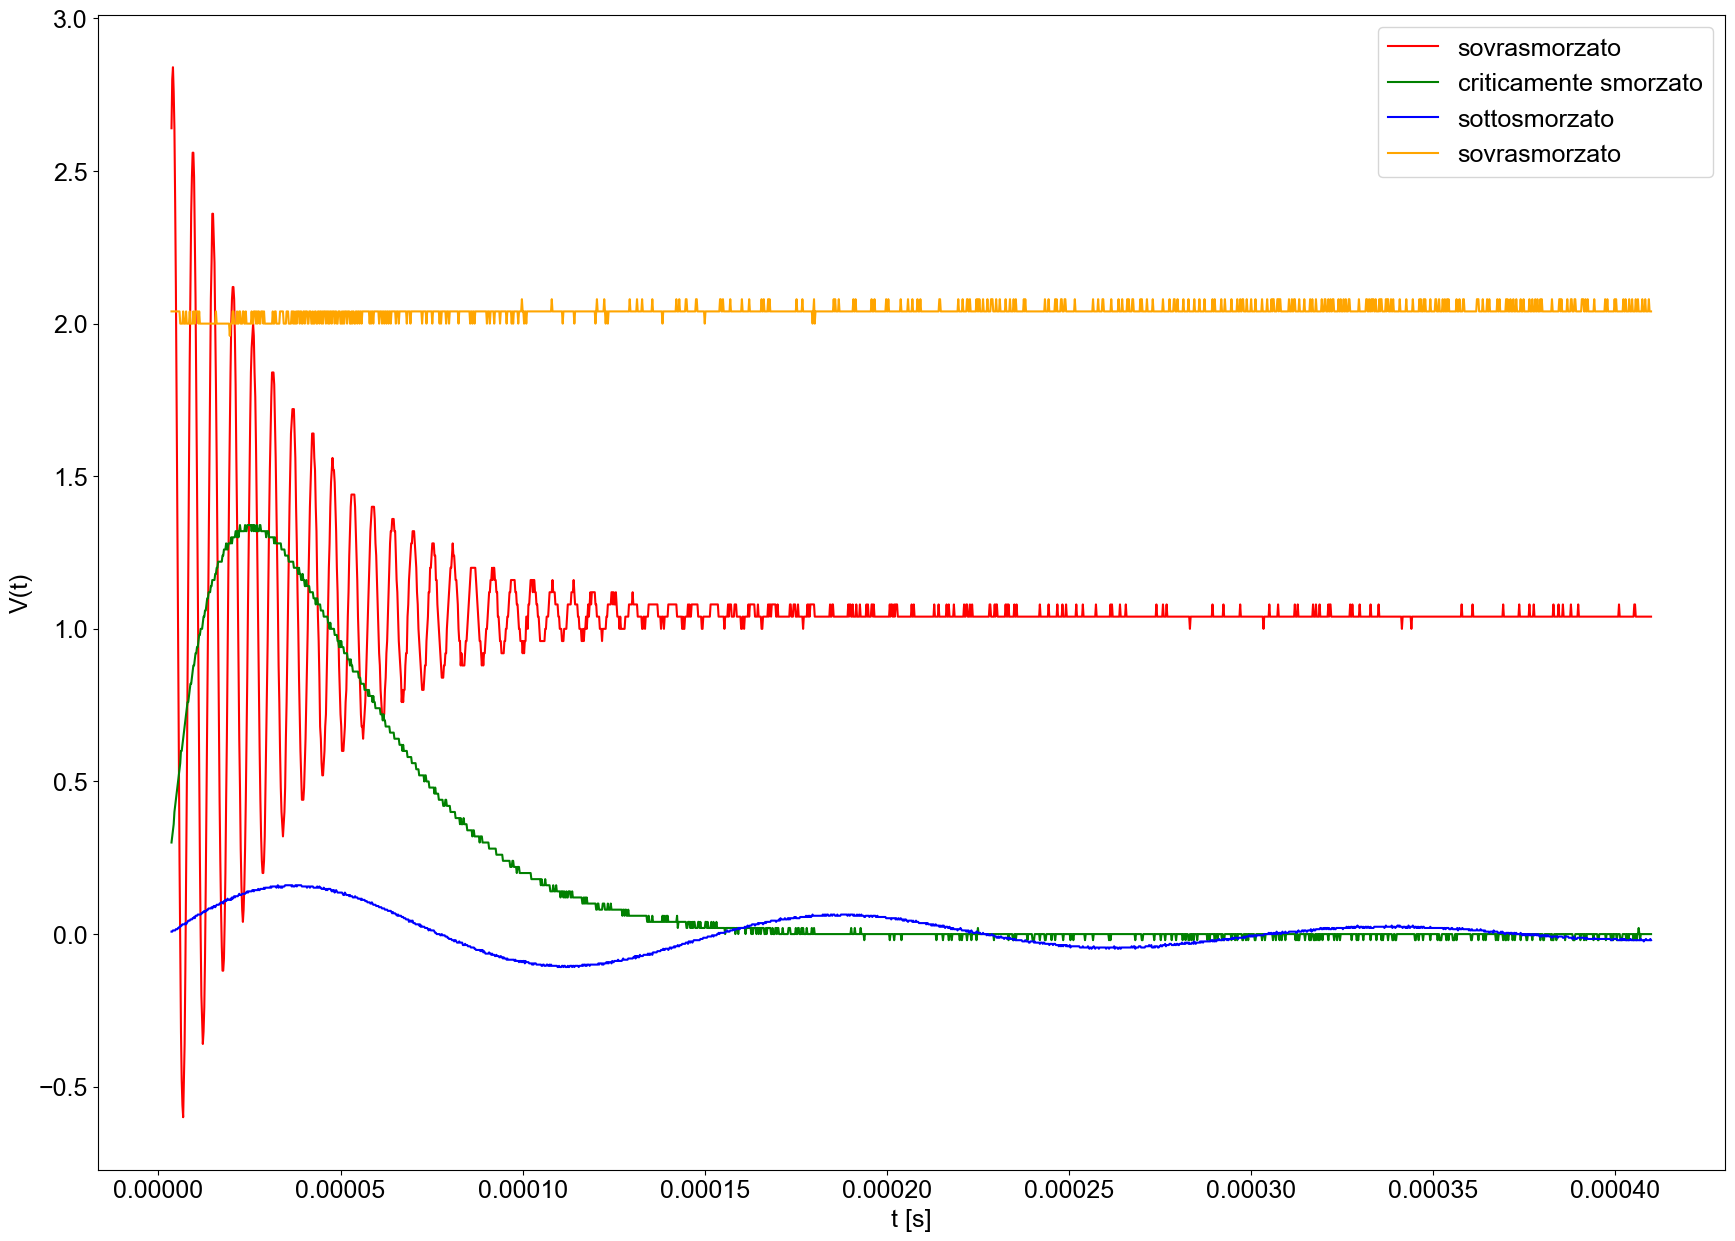

In [24]:
#start from t = 0 
for df in [sovrasmorzato_CH1, sovrasmorzato_CH2, criticamente_smorzato_CH1, criticamente_smorzato_CH2, sottosmorzato_CH1, sottosmorzato_CH2]:
    #find the index of the element with t = 0
    index = df[df["t"] == 0].index[0]
    #drop all the elements before t = 0
    df.drop(df.index[0:index], inplace=True)
    df.reset_index(drop=True, inplace=True)
    #drop all the elements after t = 0.00045
    #find closest index to 0.00045
    index = df.iloc[(df["t"]-0.00041).abs().argsort()[:1]].index[0]
    df.drop(df.index[index:], inplace=True)
    df.reset_index(drop=True, inplace=True)

#plot the data, only channel 2 which is the voltage at the end of the RLC circuit
plt.plot(sovrasmorzato_CH2["t"],sovrasmorzato_CH2["V"], label="sovrasmorzato", color="r")
plt.plot(criticamente_smorzato_CH2["t"],criticamente_smorzato_CH2["V"], label="criticamente smorzato", color="g")
plt.plot(sottosmorzato_CH2["t"],sottosmorzato_CH2["V"], label="sottosmorzato", color="b")
#plot CH1 data, which is the generator voltage
plt.plot(sovrasmorzato_CH1["t"],sovrasmorzato_CH1["V"], label="sovrasmorzato", color="orange")

plt.legend()
plt.xlabel("t [s]")
plt.ylabel("V(t)")

### Sottosmorzato

<ErrorbarContainer object of 3 artists>

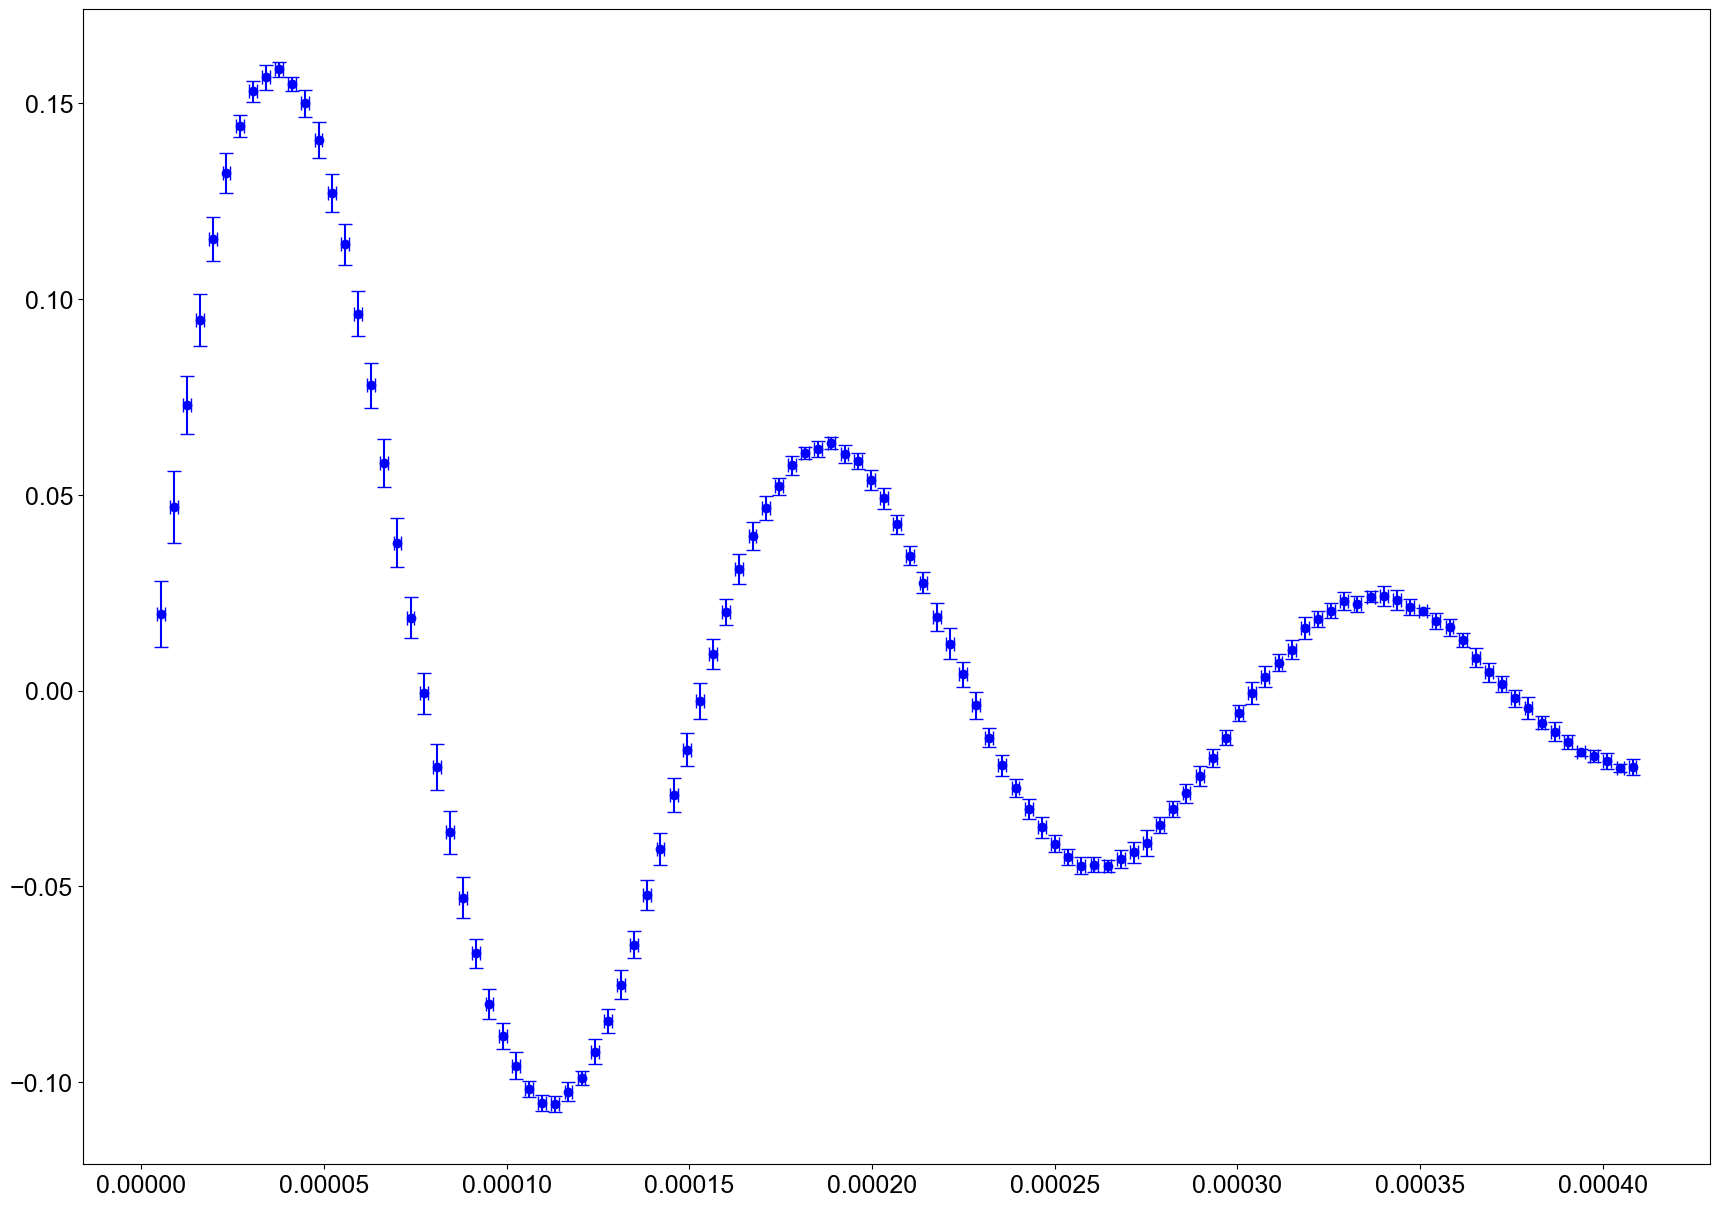

In [25]:
#cluster the data
ns = 110
sotto_smorzato_time, sotto_smorzato_voltage, sotto_smorzato_time_err, sotto_smorzato_voltage_err = lu.simple_sampling(sottosmorzato_CH2["t"],sottosmorzato_CH2["V"],n_samples=ns)
#plot clustered data
plt.errorbar(sotto_smorzato_time, sotto_smorzato_voltage, xerr=sotto_smorzato_time_err, yerr=sotto_smorzato_voltage_err, fmt="o", label="sottosmorzato", color="b")

In [28]:
#export clustered data
sotto_smorzato_data = pd.DataFrame({"t":sotto_smorzato_time, "V":sotto_smorzato_voltage, "t_err":sotto_smorzato_time_err, "V_err":sotto_smorzato_voltage_err})
sotto_smorzato_data.to_csv("data/RLC/sottosmorzato/sottosmorzato_clustered.csv", index=False)

#### Smorzamento critico

<ErrorbarContainer object of 3 artists>

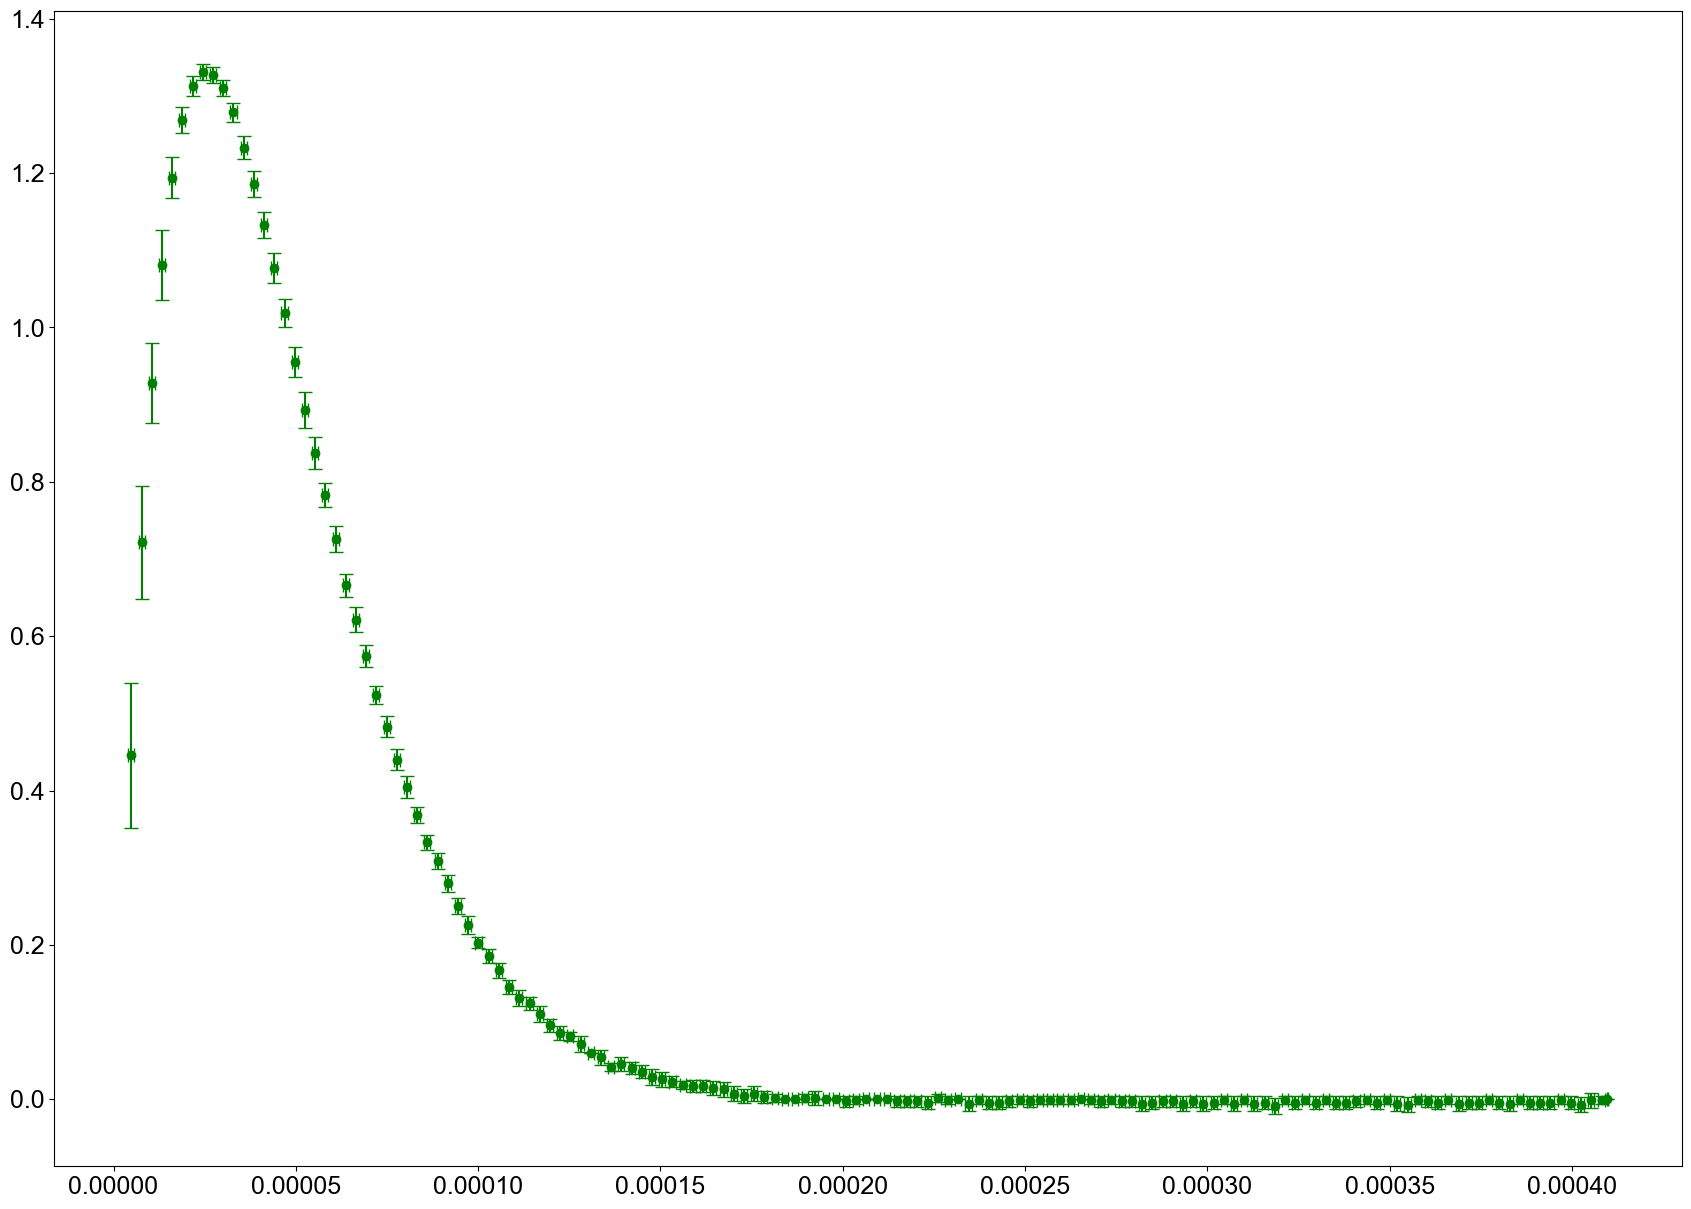

In [37]:
#cluster the data
ns = 140
criticamente_smorzato_time, criticamente_smorzato_voltage, criticamente_smorzato_time_err, criticamente_smorzato_voltage_err = lu.simple_sampling(criticamente_smorzato_CH2["t"],criticamente_smorzato_CH2["V"],n_samples=ns)
#plot clustered data
plt.errorbar(criticamente_smorzato_time, criticamente_smorzato_voltage, xerr=criticamente_smorzato_time_err, yerr=criticamente_smorzato_voltage_err, fmt="o", label="criticamente smorzato", color="g")

In [35]:
#export clustered data
criticamente_smorzato_data = pd.DataFrame({"t":criticamente_smorzato_time, "V":criticamente_smorzato_voltage, "t_err":criticamente_smorzato_time_err, "V_err":criticamente_smorzato_voltage_err})
#remove the first 12 points

#shift time so that t = 0 is the first point
criticamente_smorzato_data["t"] = criticamente_smorzato_data["t"] - criticamente_smorzato_data["t"][0]
criticamente_smorzato_data.to_csv("data/RLC/smorzamentocritico/crit_smorzato_clustered.csv", index=False)